In [61]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

mpl.rc('figure', figsize=(8, 5))
mpl.rc('figure', dpi=300)

# Table of Contents
>## 1. MNIST
* 1.1. 1 Convolution Layer
* 1.2. 2 Convolution Layer

>## 2. CIFAR10 
* 2.1. Data Preprocessing
* 2.2. Modelling
* 2.3. Training

>## 3. Image Augmentation

>## 4. VGG16

# 1. MNIST

In [62]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

In [63]:
X_train.shape

(60000, 28, 28, 1)

## 1.1. 1 Convolution Layer

In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2


model1 = Sequential()
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [65]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [66]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 25s - loss: 0.8311 - acc: 0.7674 - val_loss: 0.3714 - val_acc: 0.8937
Epoch 2/10
 - 24s - loss: 0.3147 - acc: 0.9097 - val_loss: 0.2719 - val_acc: 0.9213
Epoch 3/10
 - 26s - loss: 0.2530 - acc: 0.9277 - val_loss: 0.2207 - val_acc: 0.9376
Epoch 4/10
 - 26s - loss: 0.2166 - acc: 0.9382 - val_loss: 0.1883 - val_acc: 0.9443
Epoch 5/10
 - 24s - loss: 0.1904 - acc: 0.9452 - val_loss: 0.1697 - val_acc: 0.9523
Epoch 6/10
 - 26s - loss: 0.1723 - acc: 0.9505 - val_loss: 0.1601 - val_acc: 0.9539
Epoch 7/10
 - 26s - loss: 0.1574 - acc: 0.9551 - val_loss: 0.1442 - val_acc: 0.9593
Epoch 8/10
 - 27s - loss: 0.1456 - acc: 0.9583 - val_loss: 0.1312 - val_acc: 0.9622
Epoch 9/10
 - 26s - loss: 0.1352 - acc: 0.9619 - val_loss: 0.1318 - val_acc: 0.9610
Epoch 10/10
 - 25s - loss: 0.1271 - acc: 0.9641 - val_loss: 0.1147 - val_acc: 0.9668
CPU times: user 7min 39s, sys: 4min 53s, total: 12min 33s
Wall time: 4min 15s


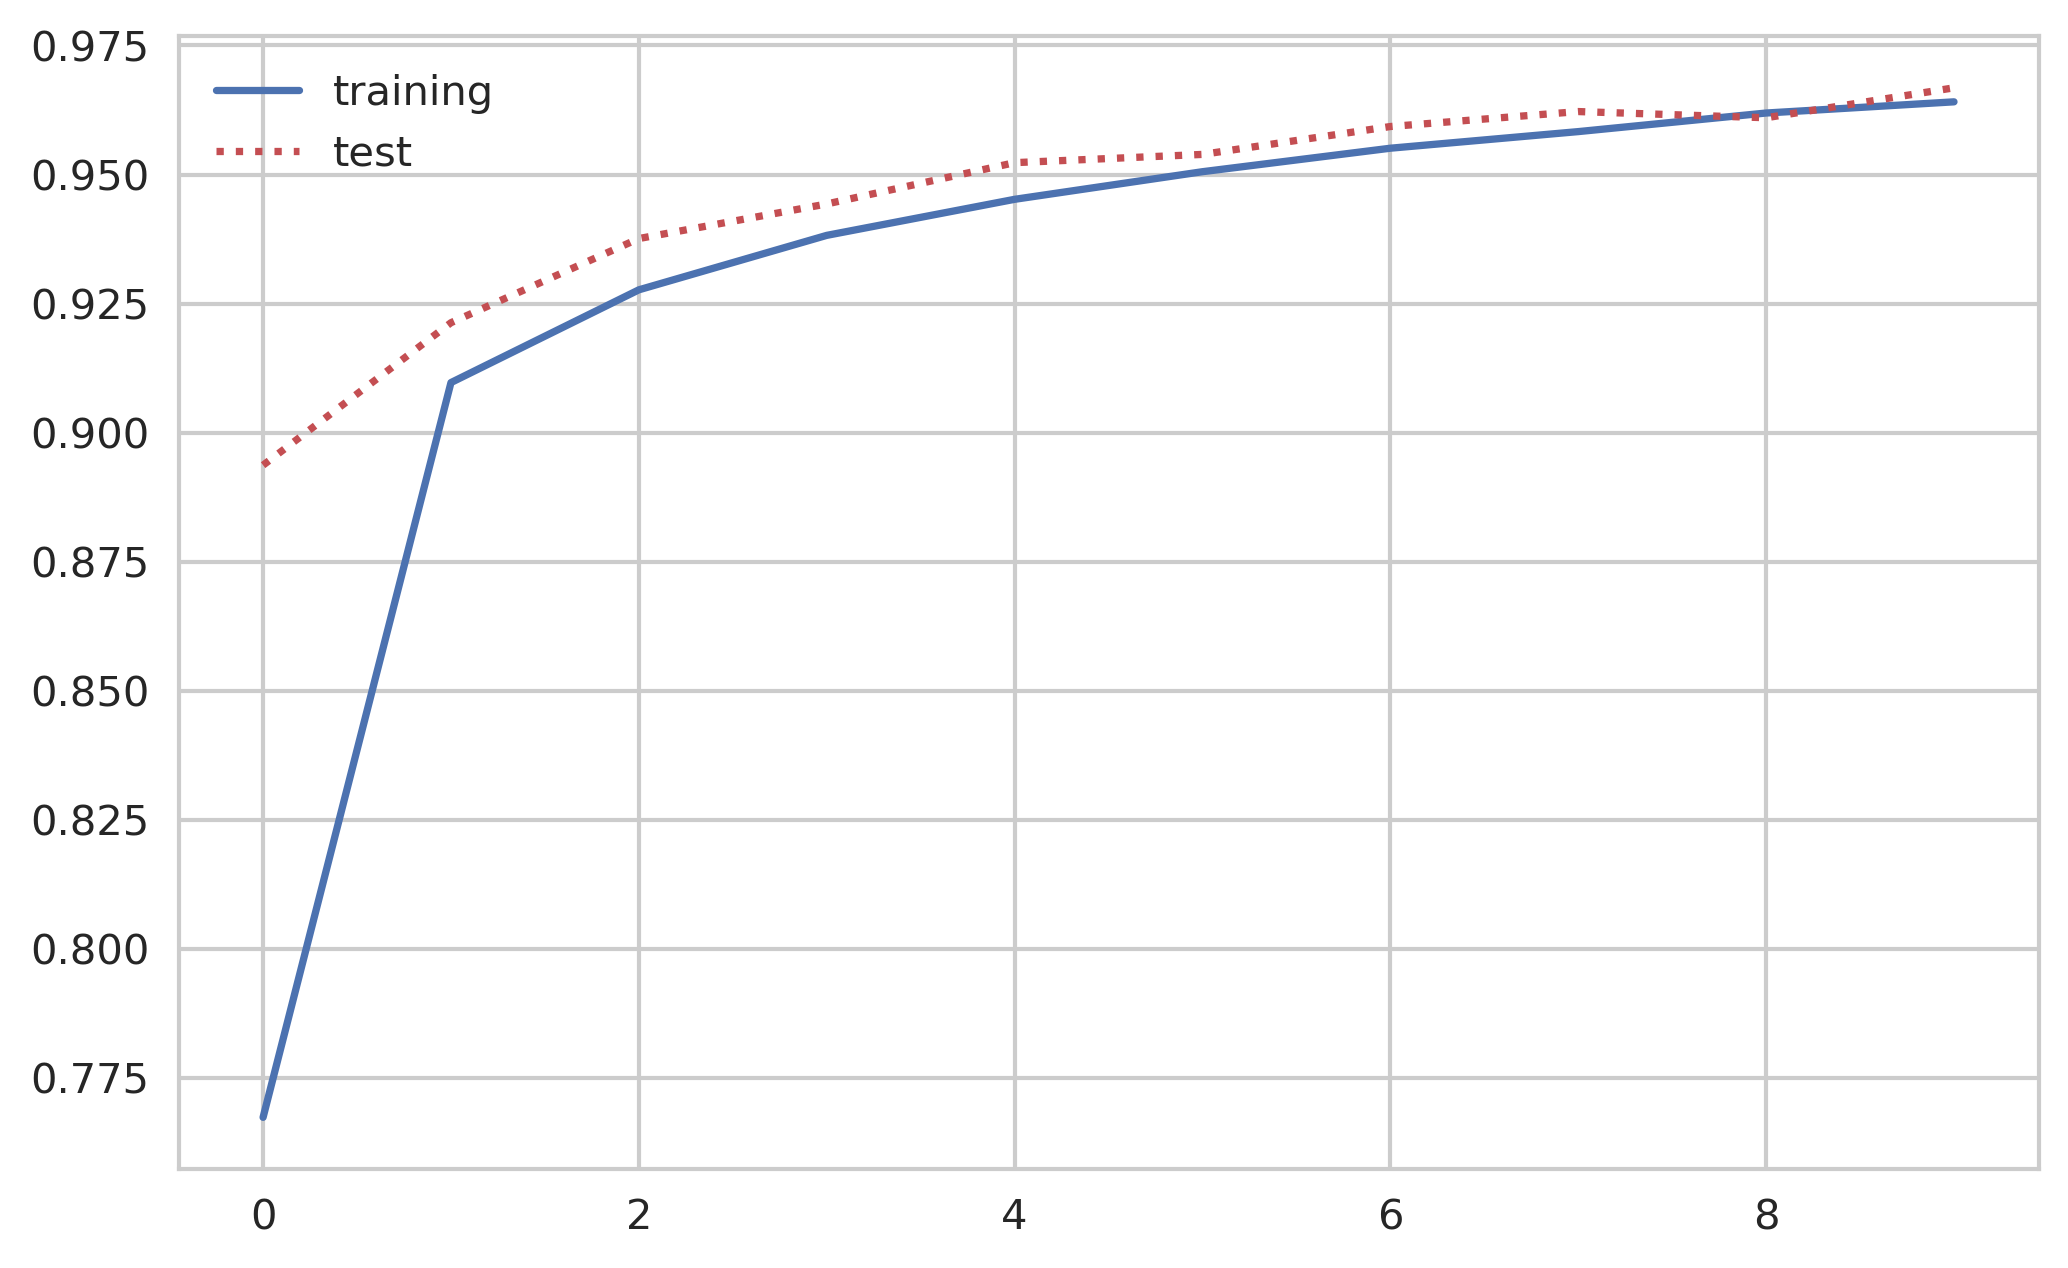

In [67]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [27]:
model1.save("mnist_cnn11.hdf5")

In [28]:
l1 = model1.layers[0]
w1, b1 = l1.get_weights()

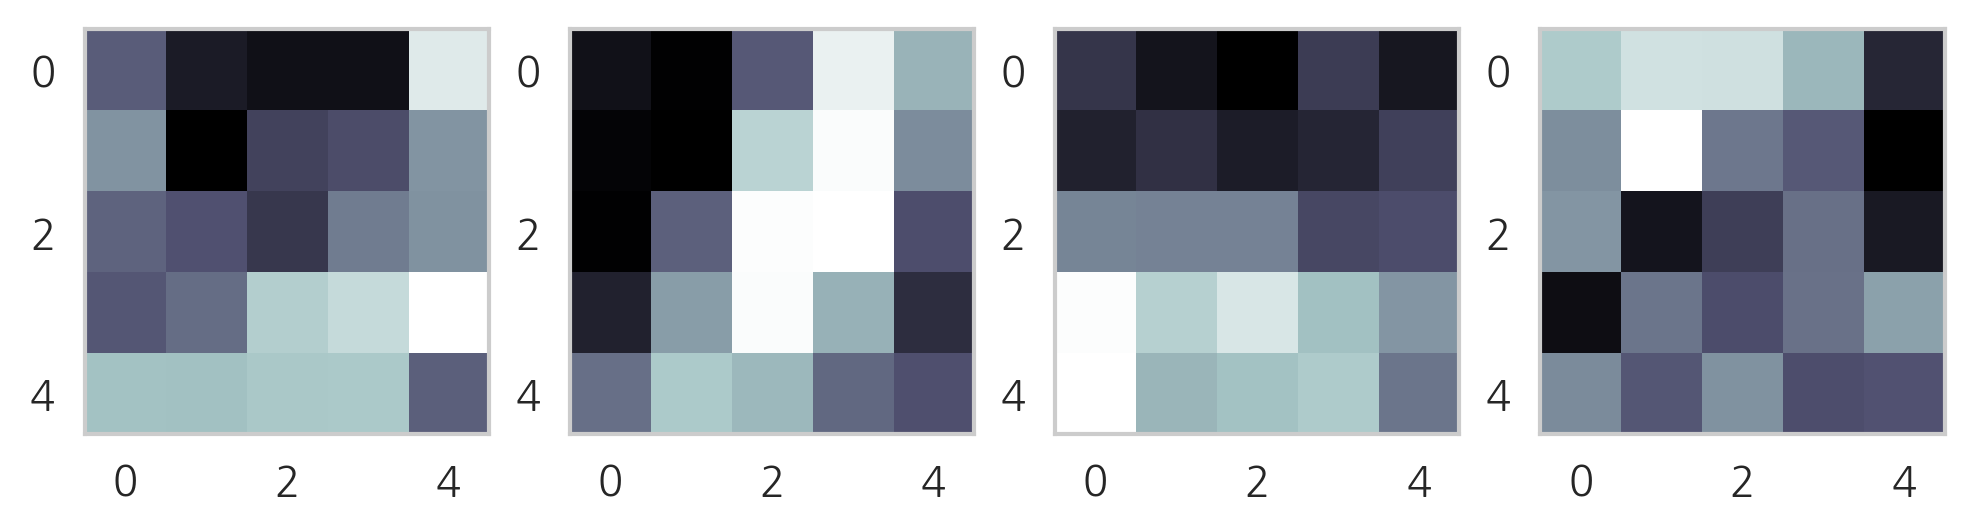

In [29]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w1[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [32]:
def visualize1(x_test):
    model1_test1 = Sequential()
    model1_test1.add(Conv2D(4, (5, 5), activation='linear', input_shape=(28, 28, 1), weights=(w1, b1)))
    model1_test2 = Sequential()
    model1_test2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), weights=(w1, b1)))
    model1_test2.add(MaxPooling2D())
    a_test = model1_test1.predict(x_test)
    z_test = model1_test2.predict(x_test)
    
    plt.figure(figsize=(10, 6))
    M = 4
    for i in range(M + 1):
        if i == 0:
            plt.subplot(3, M + 1, i + 1)
            plt.imshow(x_test[0, :, :, i], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.subplot(3, M + 1, i + 1)
            plt.imshow(w1[:, :, 0, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(3, M + 1, i + 1 + M + 1)
            plt.imshow(a_test[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(3, M + 1, i + 1 + 2 * M + 2)
            plt.imshow(z_test[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.tight_layout()
    plt.show()

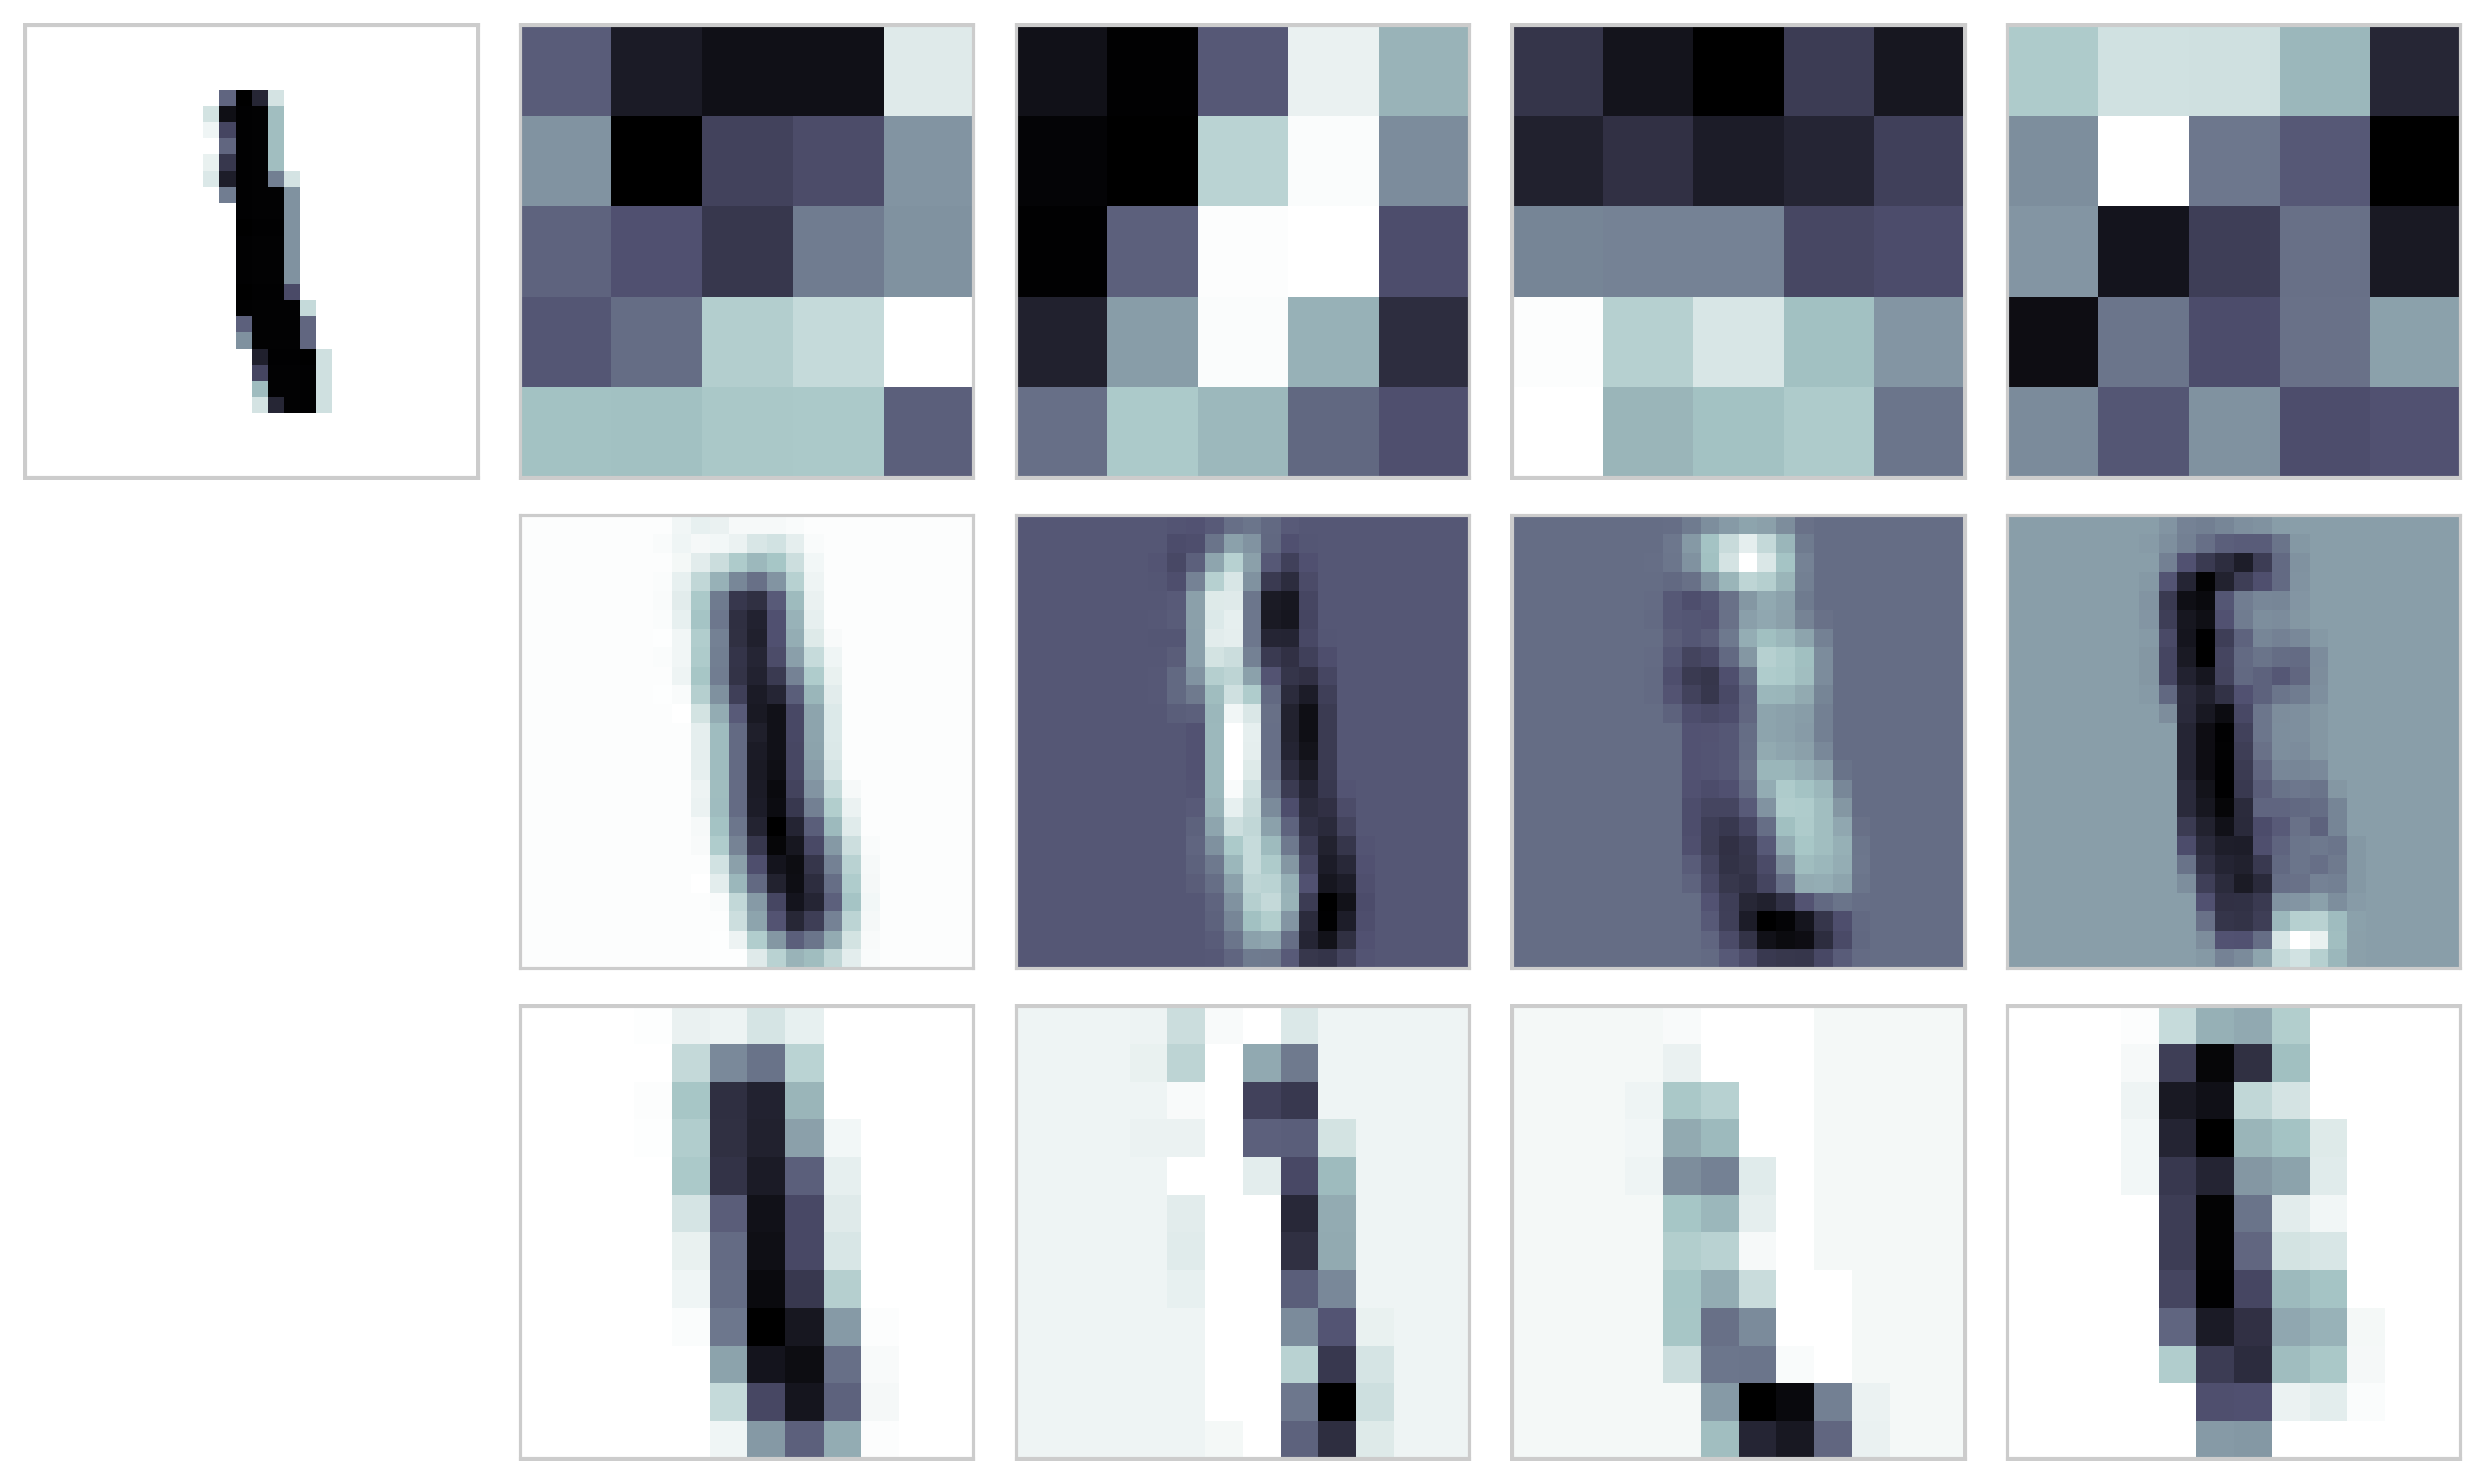

In [33]:
i = 6
visualize1(X_train[i:i + 1])

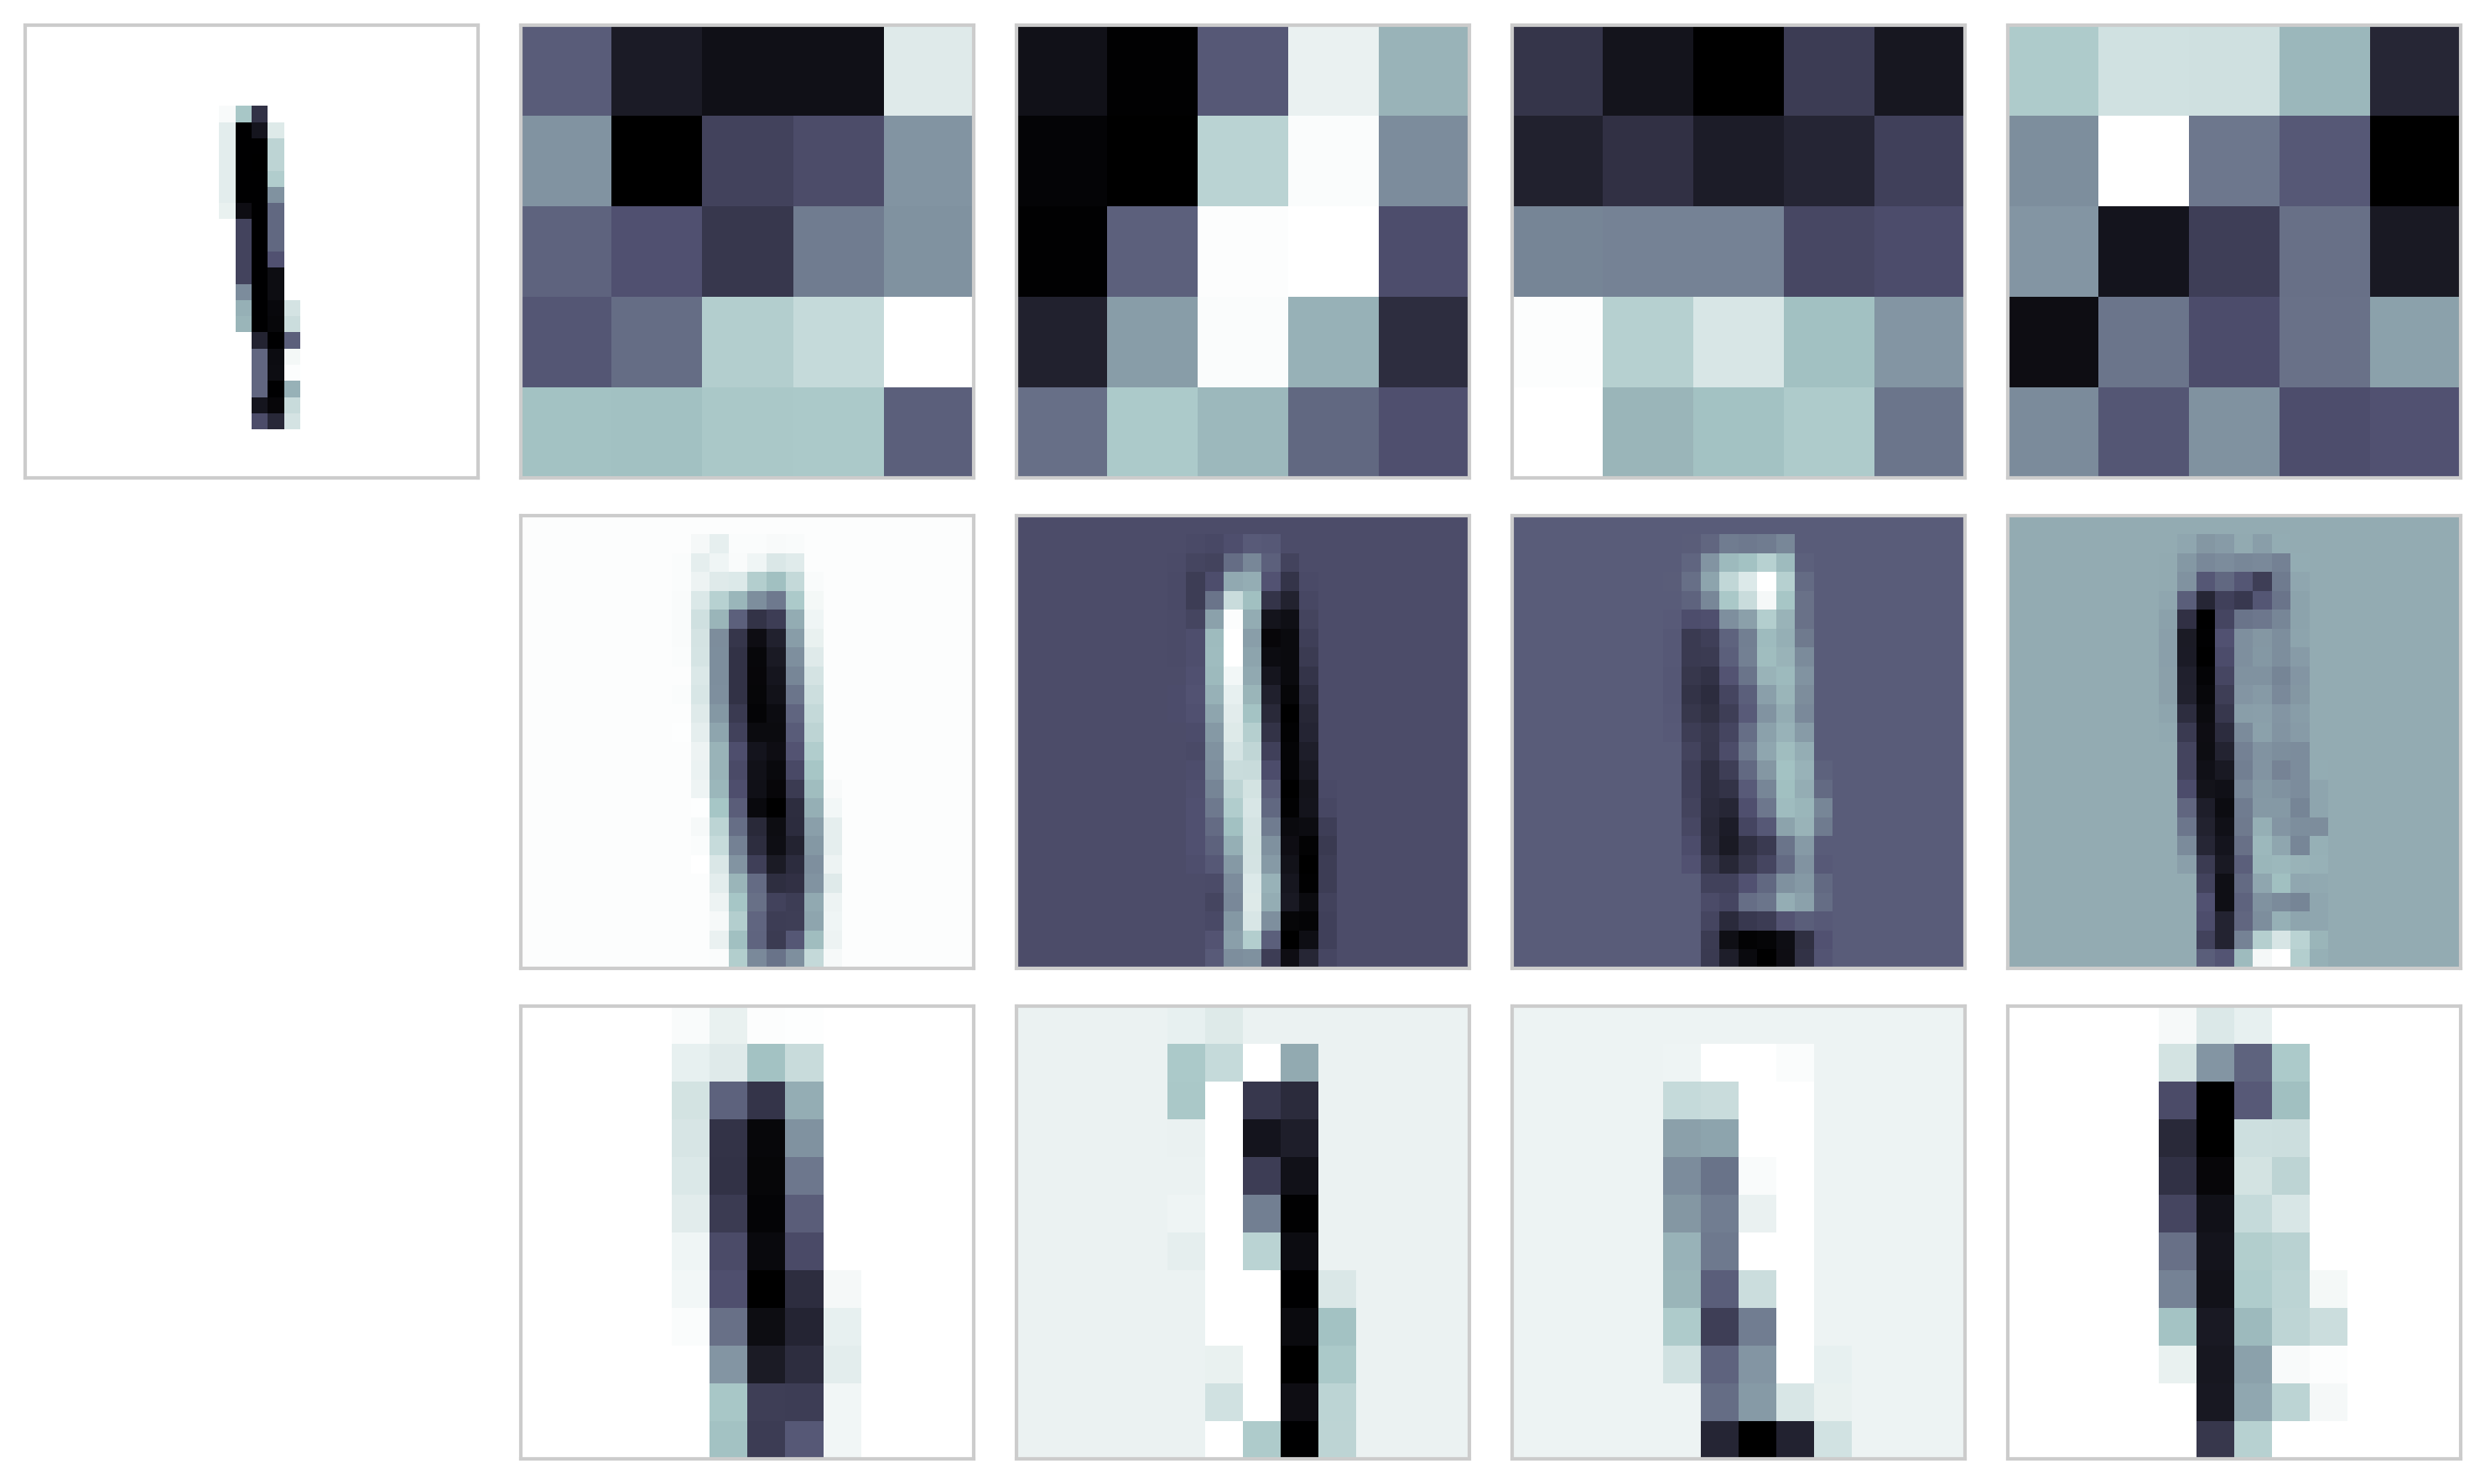

In [34]:
i = 8
visualize1(X_train[i:i + 1])

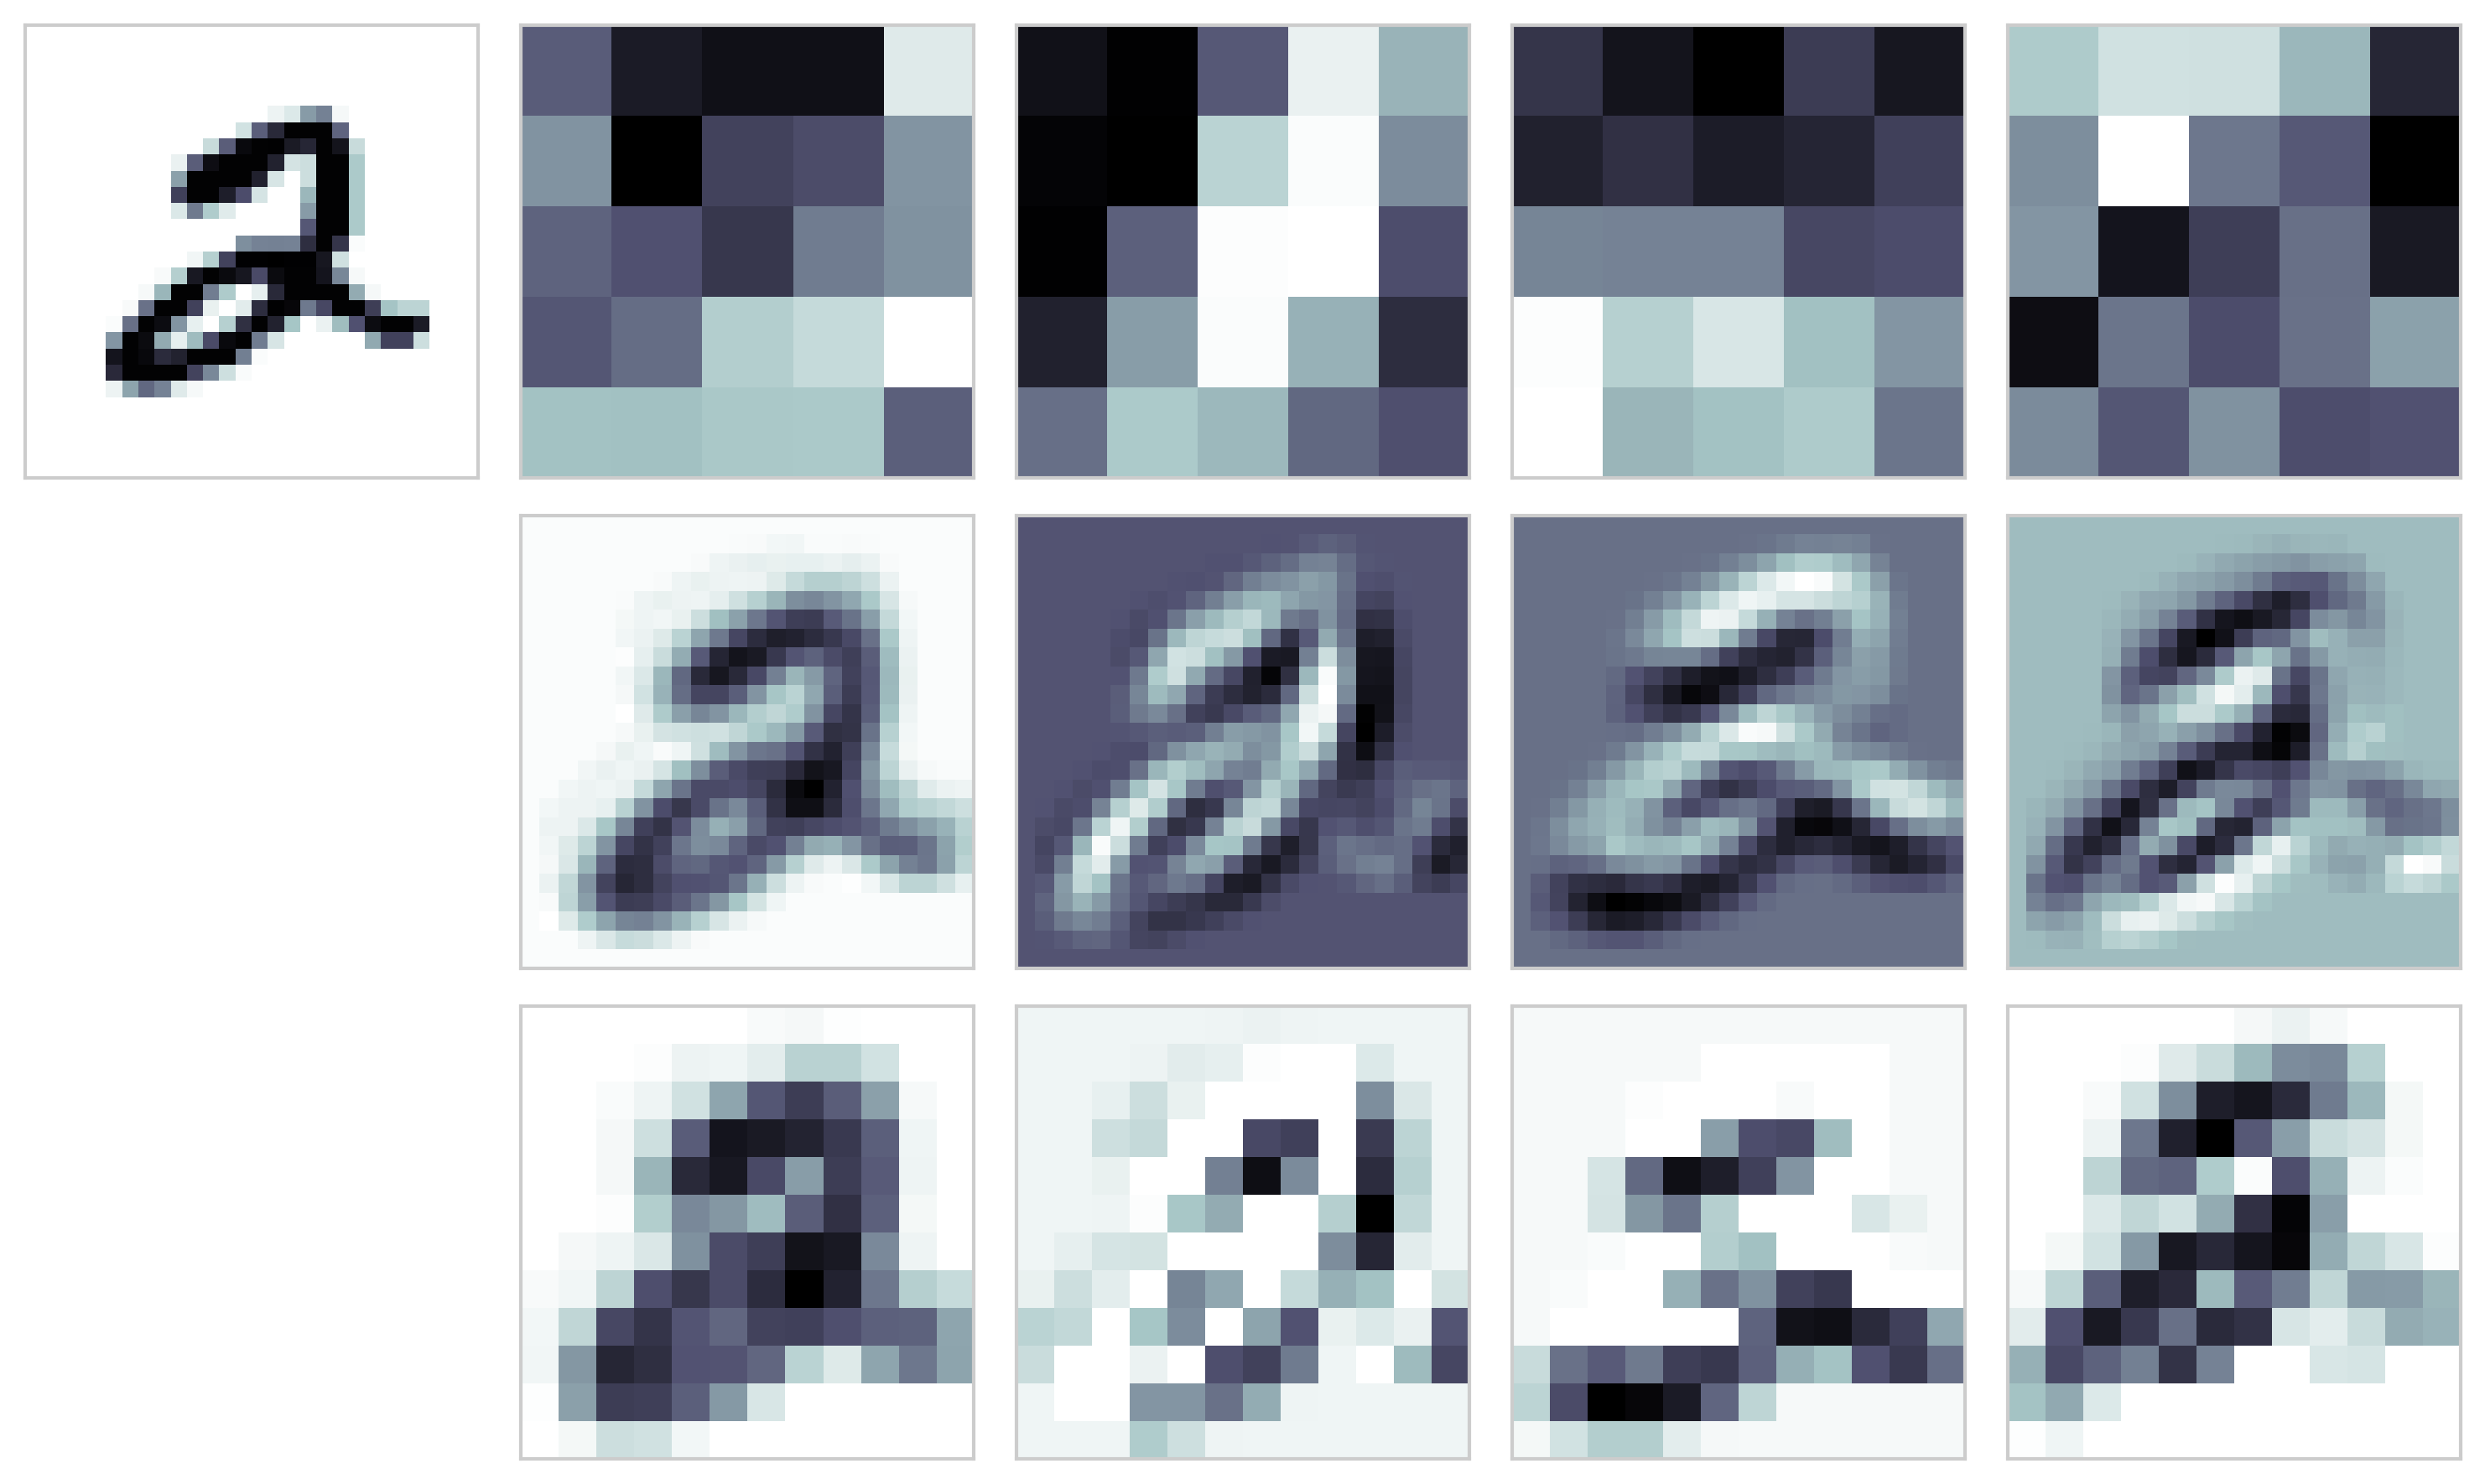

In [35]:
i = 5
visualize1(X_train[i:i + 1])

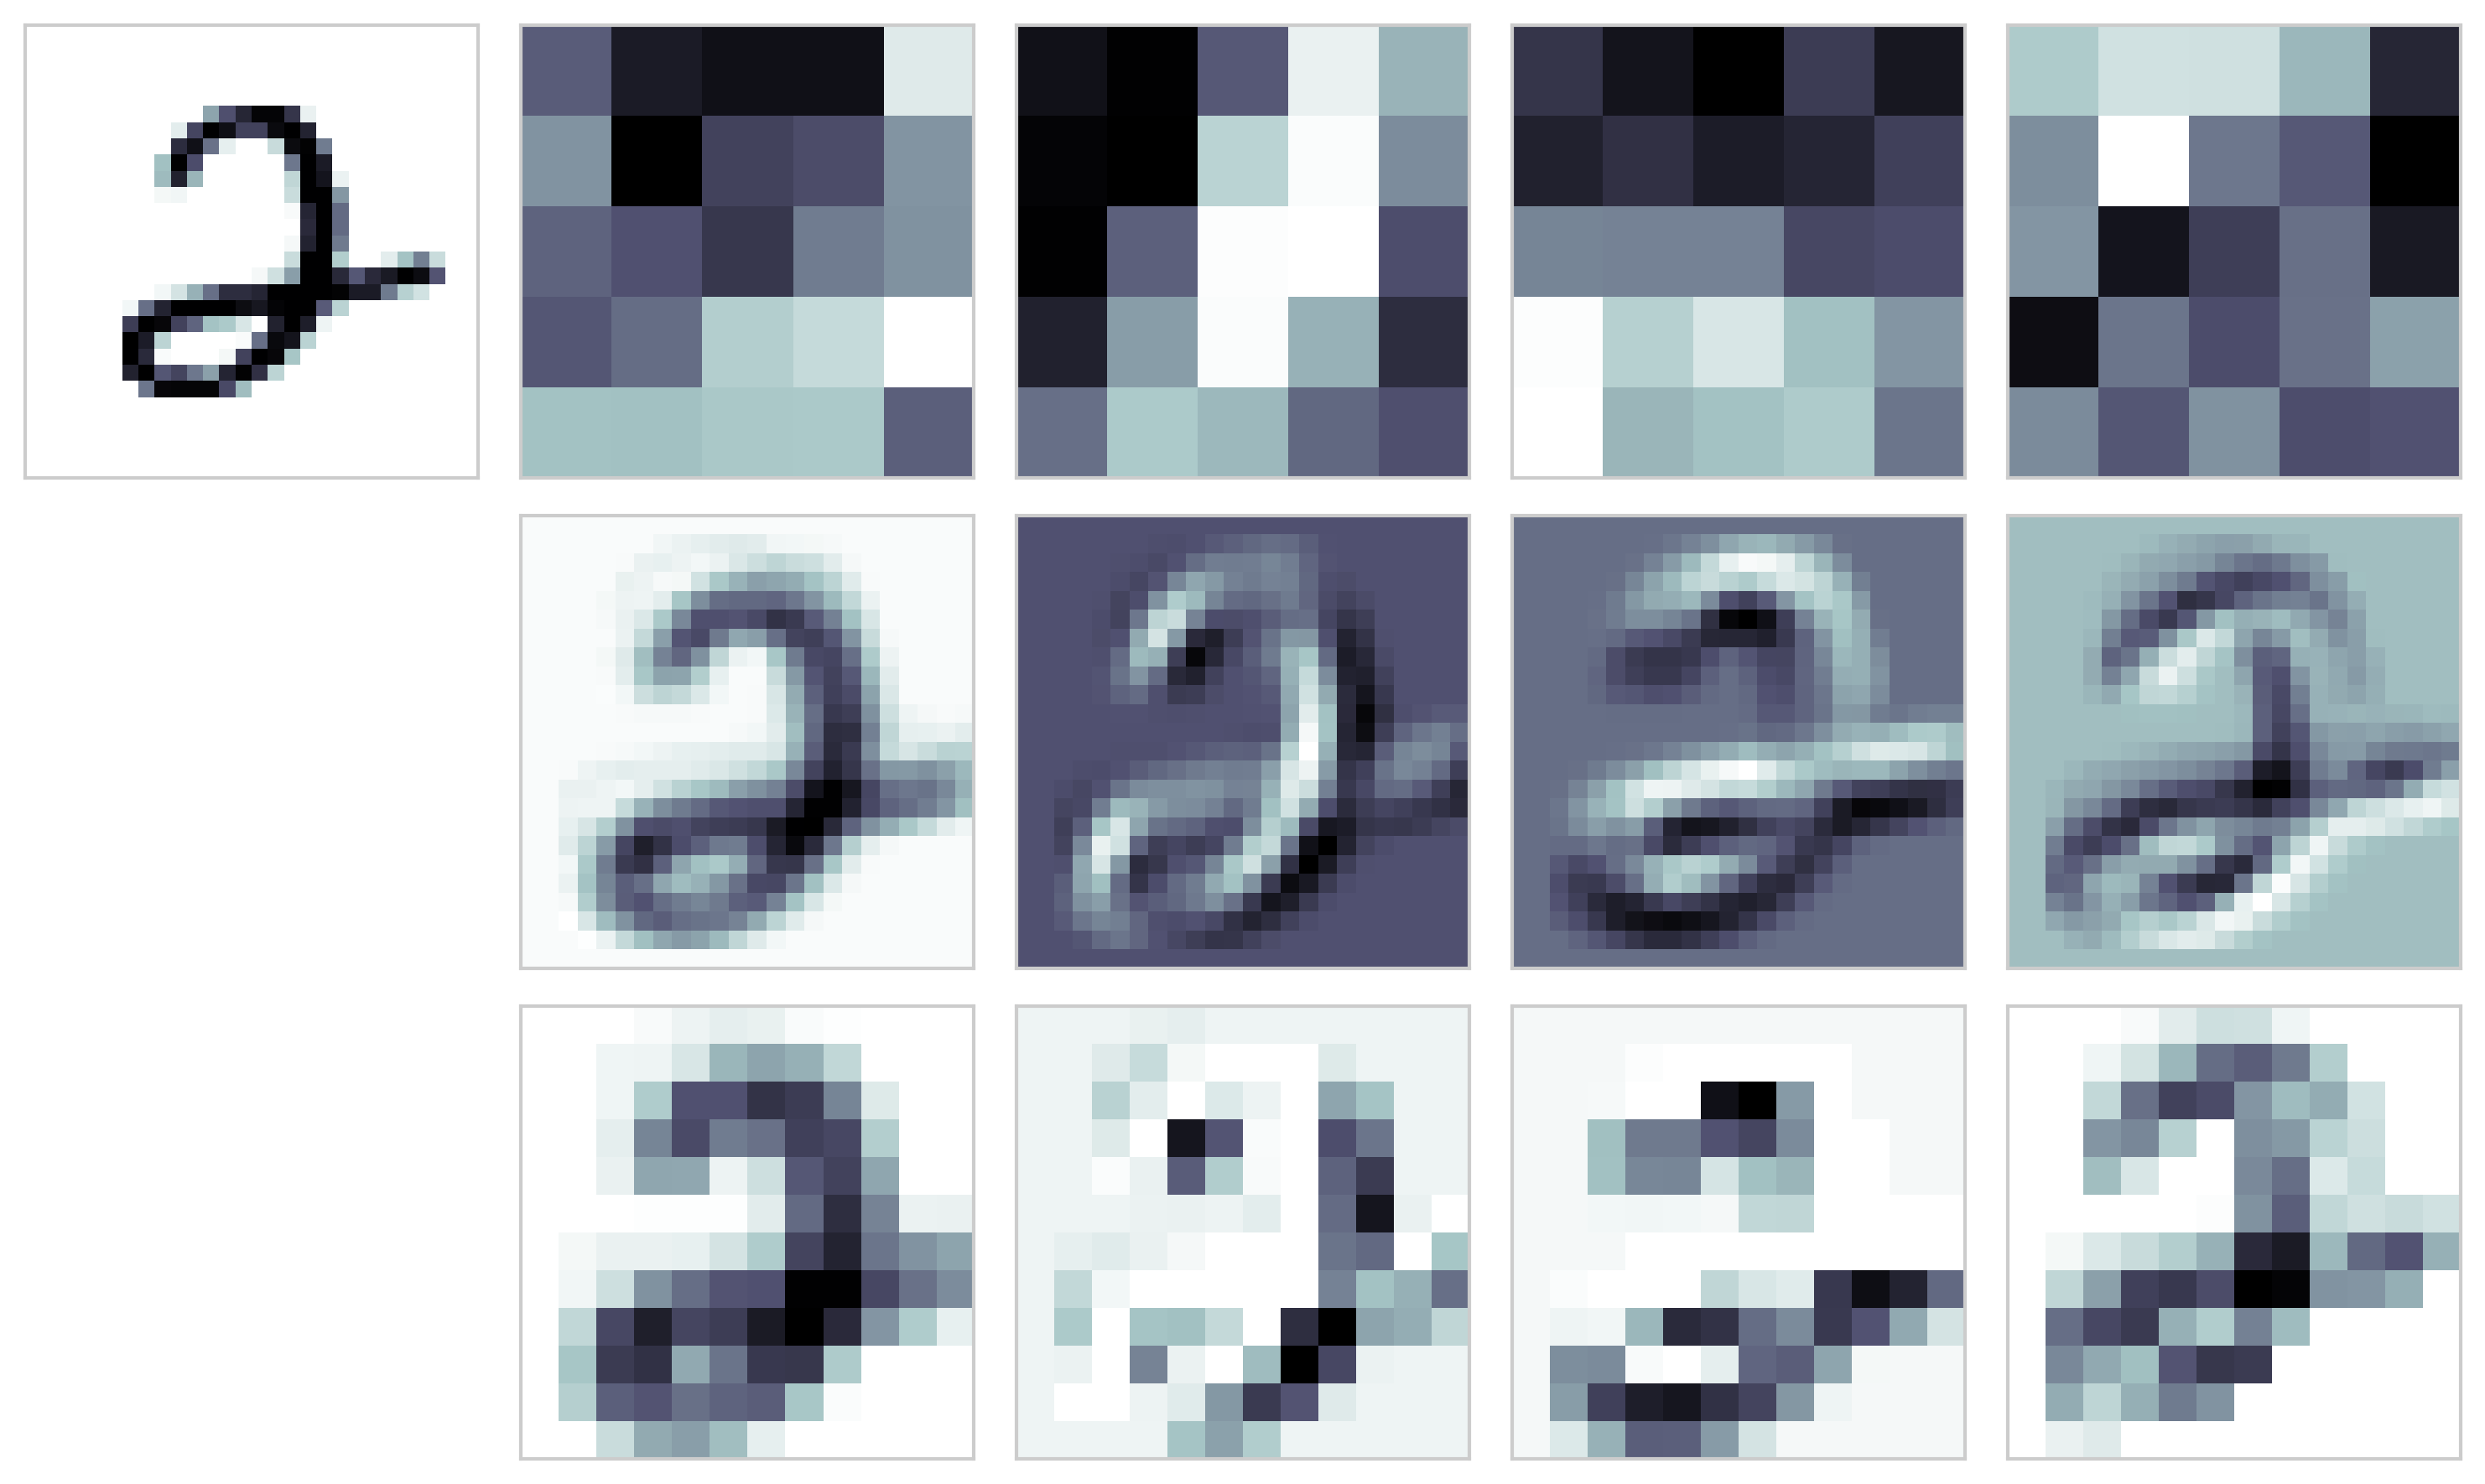

In [36]:
i = 16
visualize1(X_train[i:i + 1])

## 1.2. 2 Convolution Layers

In [46]:
np.random.seed(0)

model2 = Sequential()

model2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

In [47]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 4)           404       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 4)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [48]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [49]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 44s - loss: 1.0380 - acc: 0.6536 - val_loss: 0.4438 - val_acc: 0.8580
Epoch 2/20
 - 47s - loss: 0.3550 - acc: 0.8907 - val_loss: 0.2767 - val_acc: 0.9173
Epoch 3/20
 - 54s - loss: 0.2726 - acc: 0.9174 - val_loss: 0.2283 - val_acc: 0.9311
Epoch 4/20
 - 38s - loss: 0.2339 - acc: 0.9295 - val_loss: 0.2026 - val_acc: 0.9380
Epoch 5/20
 - 34s - loss: 0.2070 - acc: 0.9376 - val_loss: 0.1835 - val_acc: 0.9455
Epoch 6/20
 - 36s - loss: 0.1895 - acc: 0.9431 - val_loss: 0.1631 - val_acc: 0.9519
Epoch 7/20
 - 35s - loss: 0.1745 - acc: 0.9474 - val_loss: 0.1532 - val_acc: 0.9550
Epoch 8/20
 - 35s - loss: 0.1632 - acc: 0.9512 - val_loss: 0.1434 - val_acc: 0.9577
Epoch 9/20
 - 39s - loss: 0.1524 - acc: 0.9543 - val_loss: 0.1329 - val_acc: 0.9609
Epoch 10/20
 - 41s - loss: 0.1443 - acc: 0.9568 - val_loss: 0.1295 - val_acc: 0.9624
Epoch 11/20
 - 41s - loss: 0.1379 - acc: 0.9590 - val_loss: 0.1198 - val_acc: 0.9648
Epoch 12/20
 - 46s - los

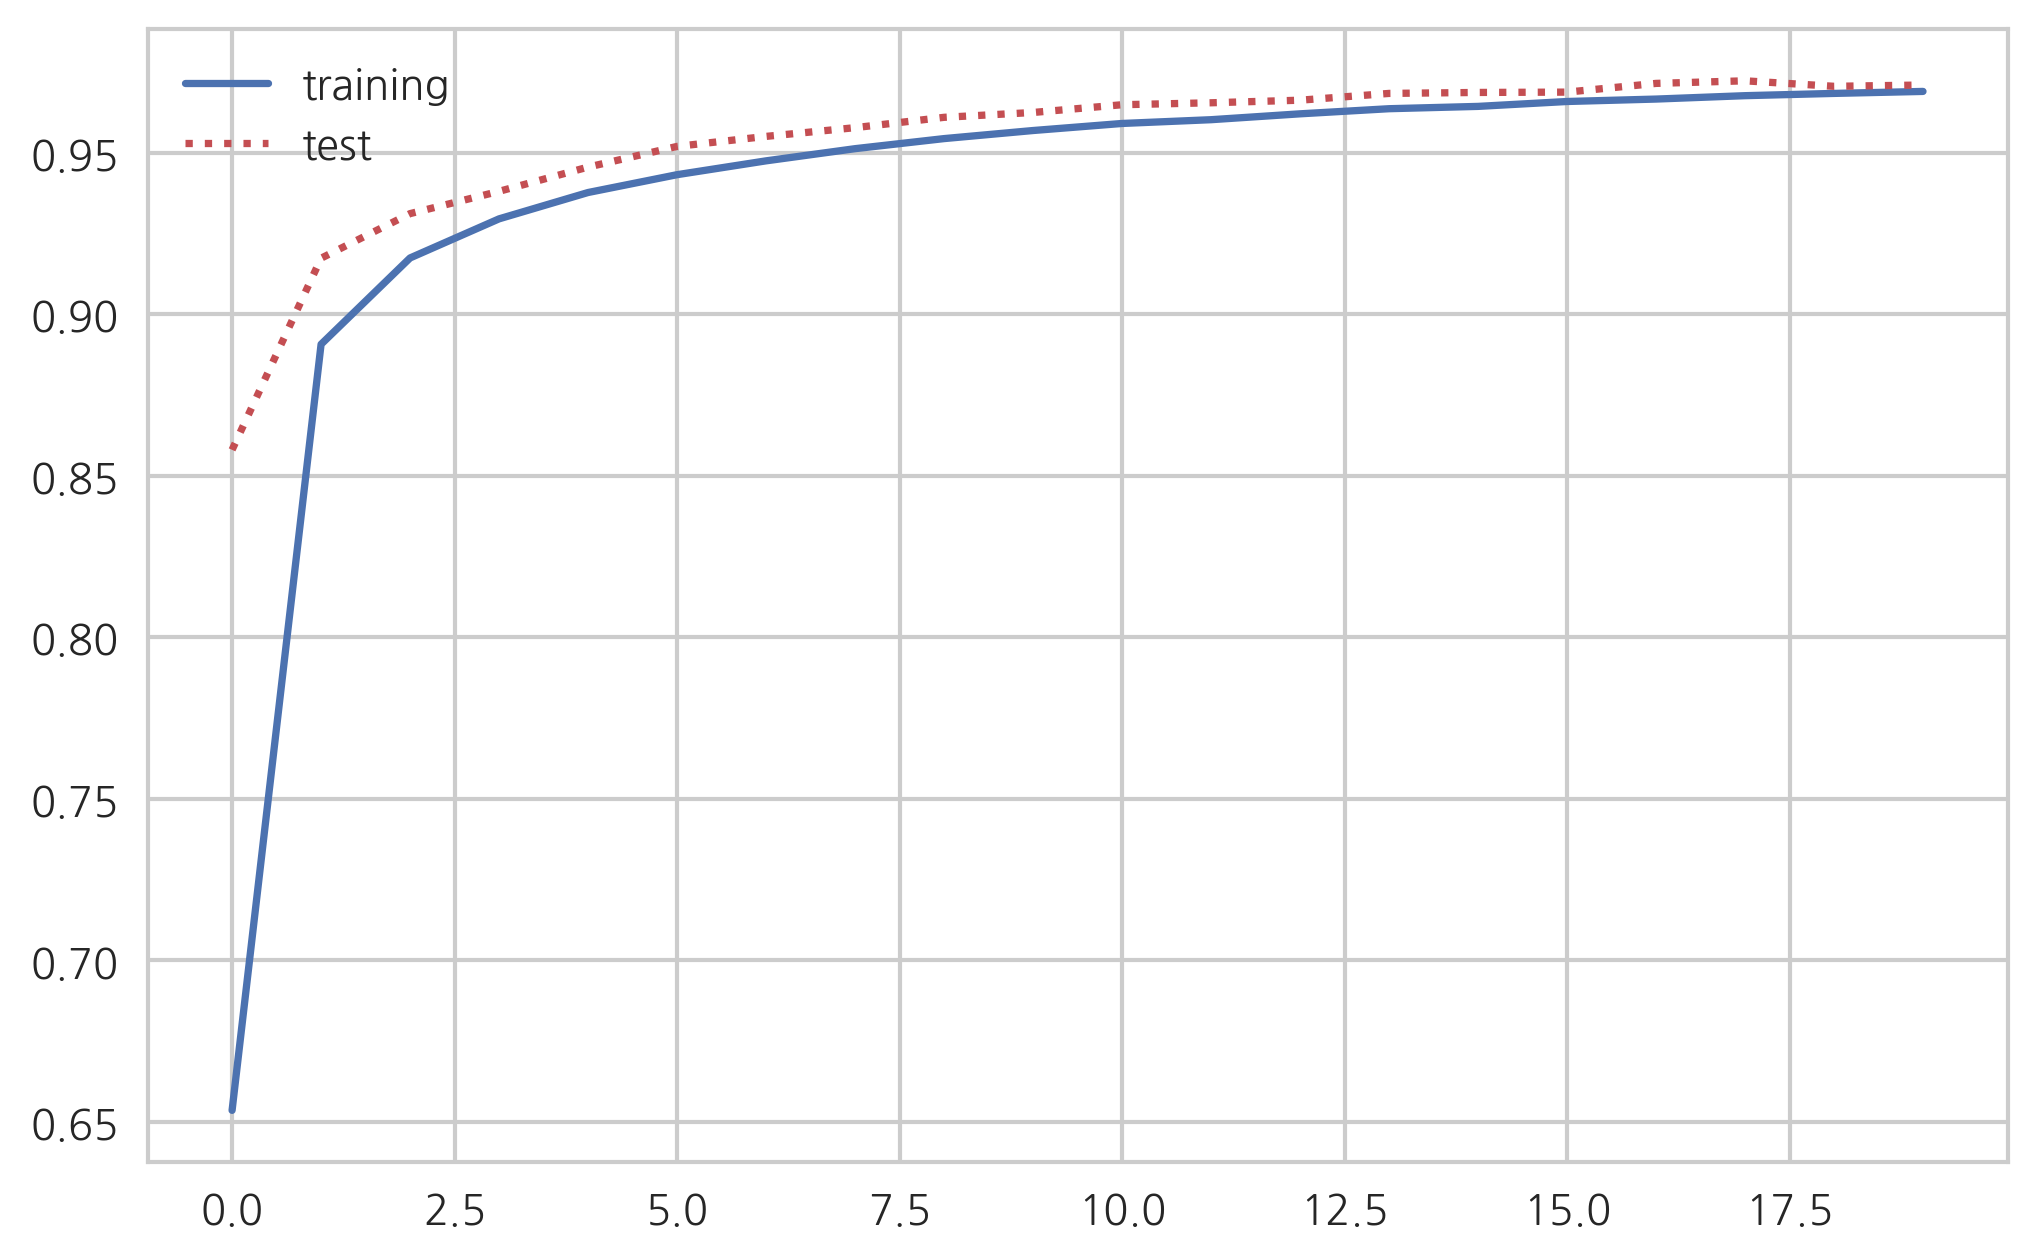

In [50]:
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [51]:
model2.save("mnist_cnn21.hdf5")

In [52]:
l21 = model2.layers[0]
w21, b21 = l21.get_weights()

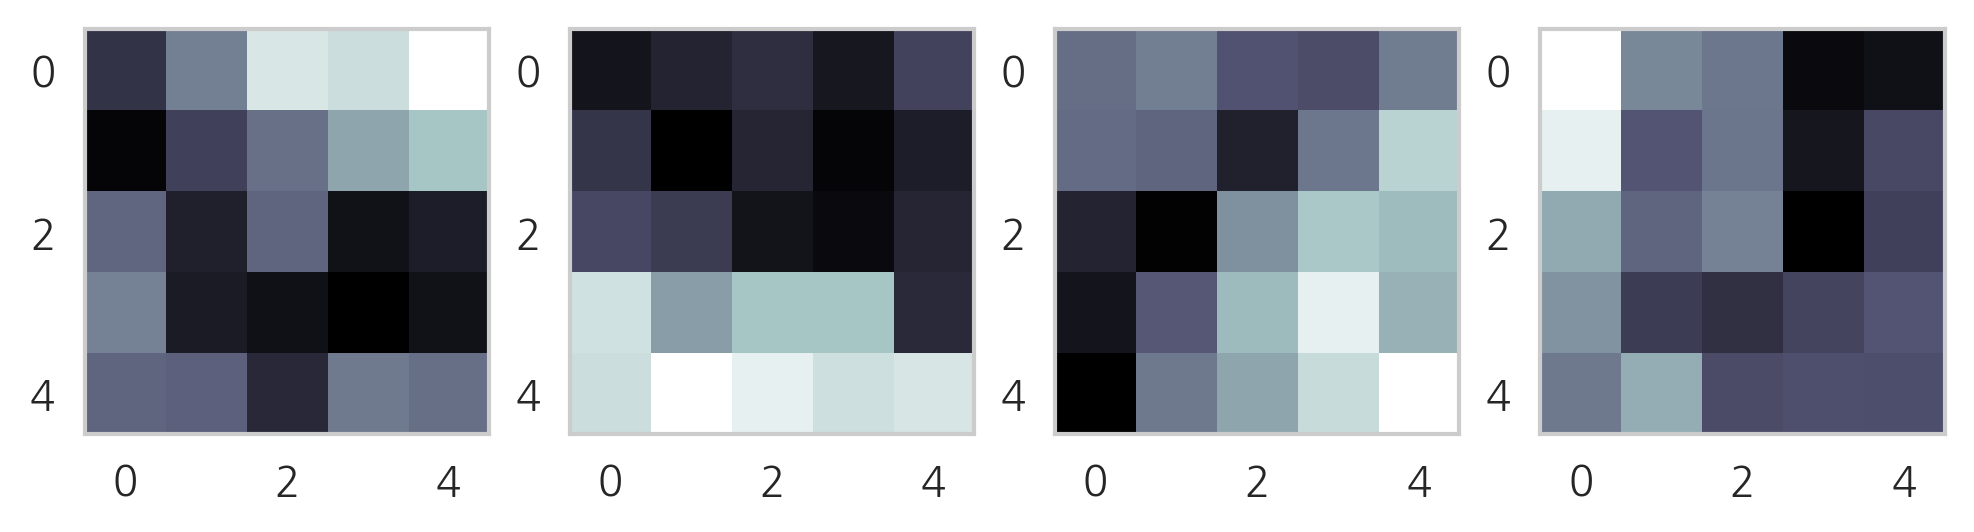

In [53]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w21[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [54]:
l22 = model2.layers[2]
w22, b22 = l22.get_weights()

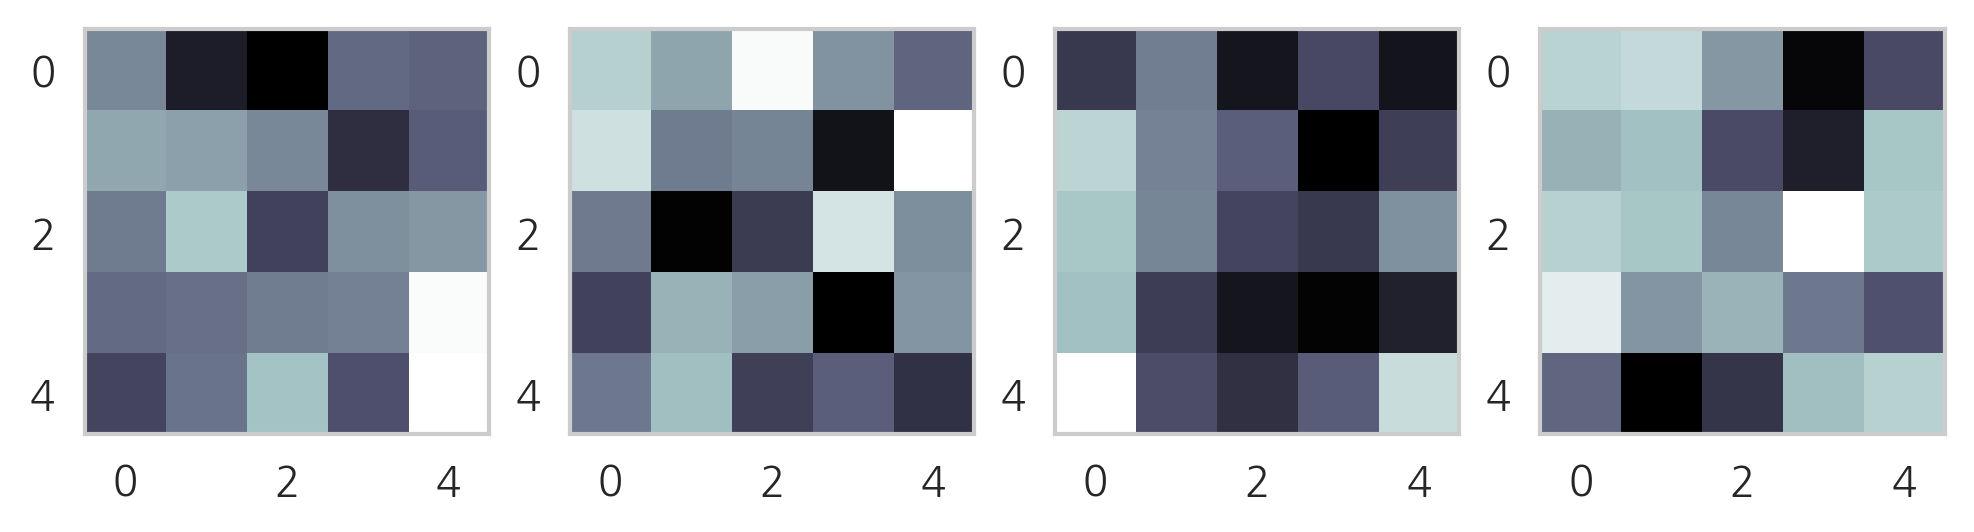

In [55]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w22[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [56]:
def visualize2(x_test):
    model1_test1 = Sequential()
    model1_test1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), weights=(w21, b21)))
    model1_test1.add(MaxPooling2D())
    a_test1 = model1_test1.predict(x_test)
    model1_test2 = Sequential()
    model1_test2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), weights=(w21, b21)))
    model1_test2.add(MaxPooling2D())
    model1_test2.add(Conv2D(4, (5, 5), activation='relu', weights=(w22, b22)))
    model1_test2.add(MaxPooling2D())
    a_test2 = model1_test2.predict(x_test)
    
    plt.figure(figsize=(10, 7))
    M = 4
    for i in range(M + 1):
        if i == 0:
            plt.subplot(4, M + 1, i + 1)
            plt.imshow(x_test[0, :, :, i], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.subplot(4, M + 1, i + 1)
            plt.imshow(w21[:, :, 0, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(4, M + 1, i + 1 + M + 1)
            plt.imshow(a_test1[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(4, M + 1, i + 1 + 2 * M + 2)
            plt.imshow(w22[:, :, 0, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(4, M + 1, i + 1 + 3 * M + 3)
            plt.imshow(a_test2[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.tight_layout()
    plt.show()

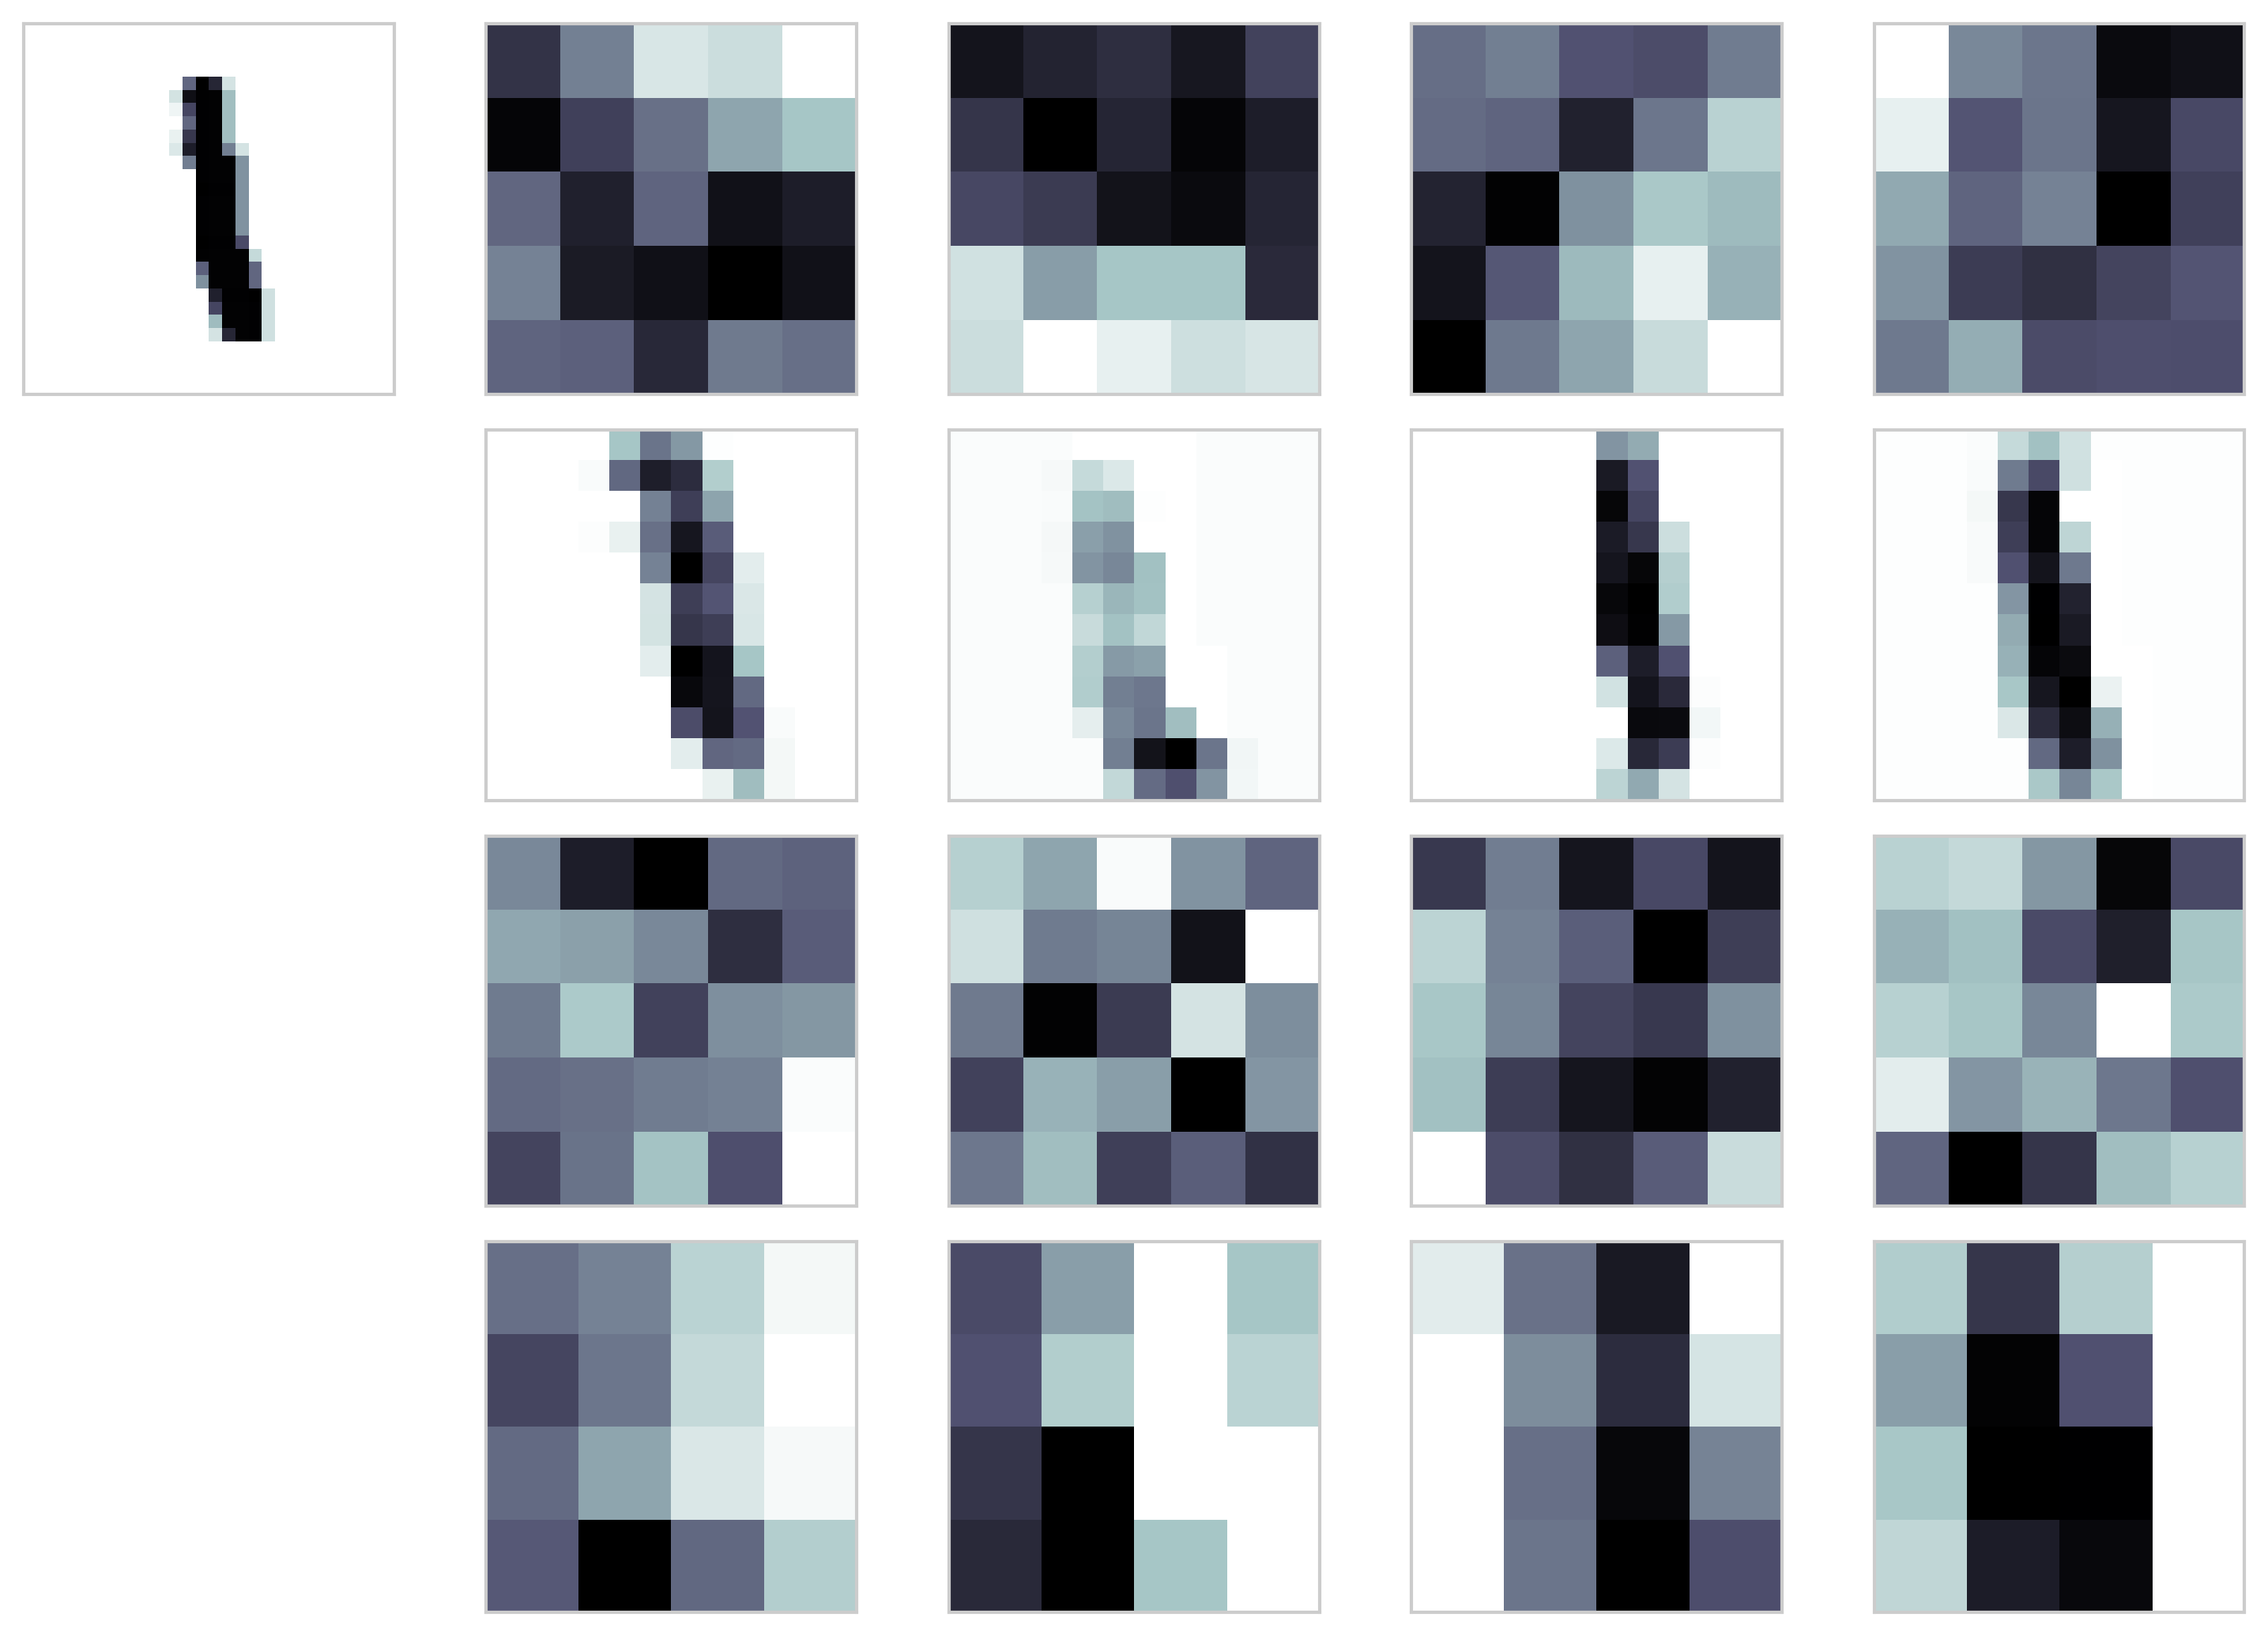

In [57]:
i = 6
visualize2(X_train[i:i + 1])

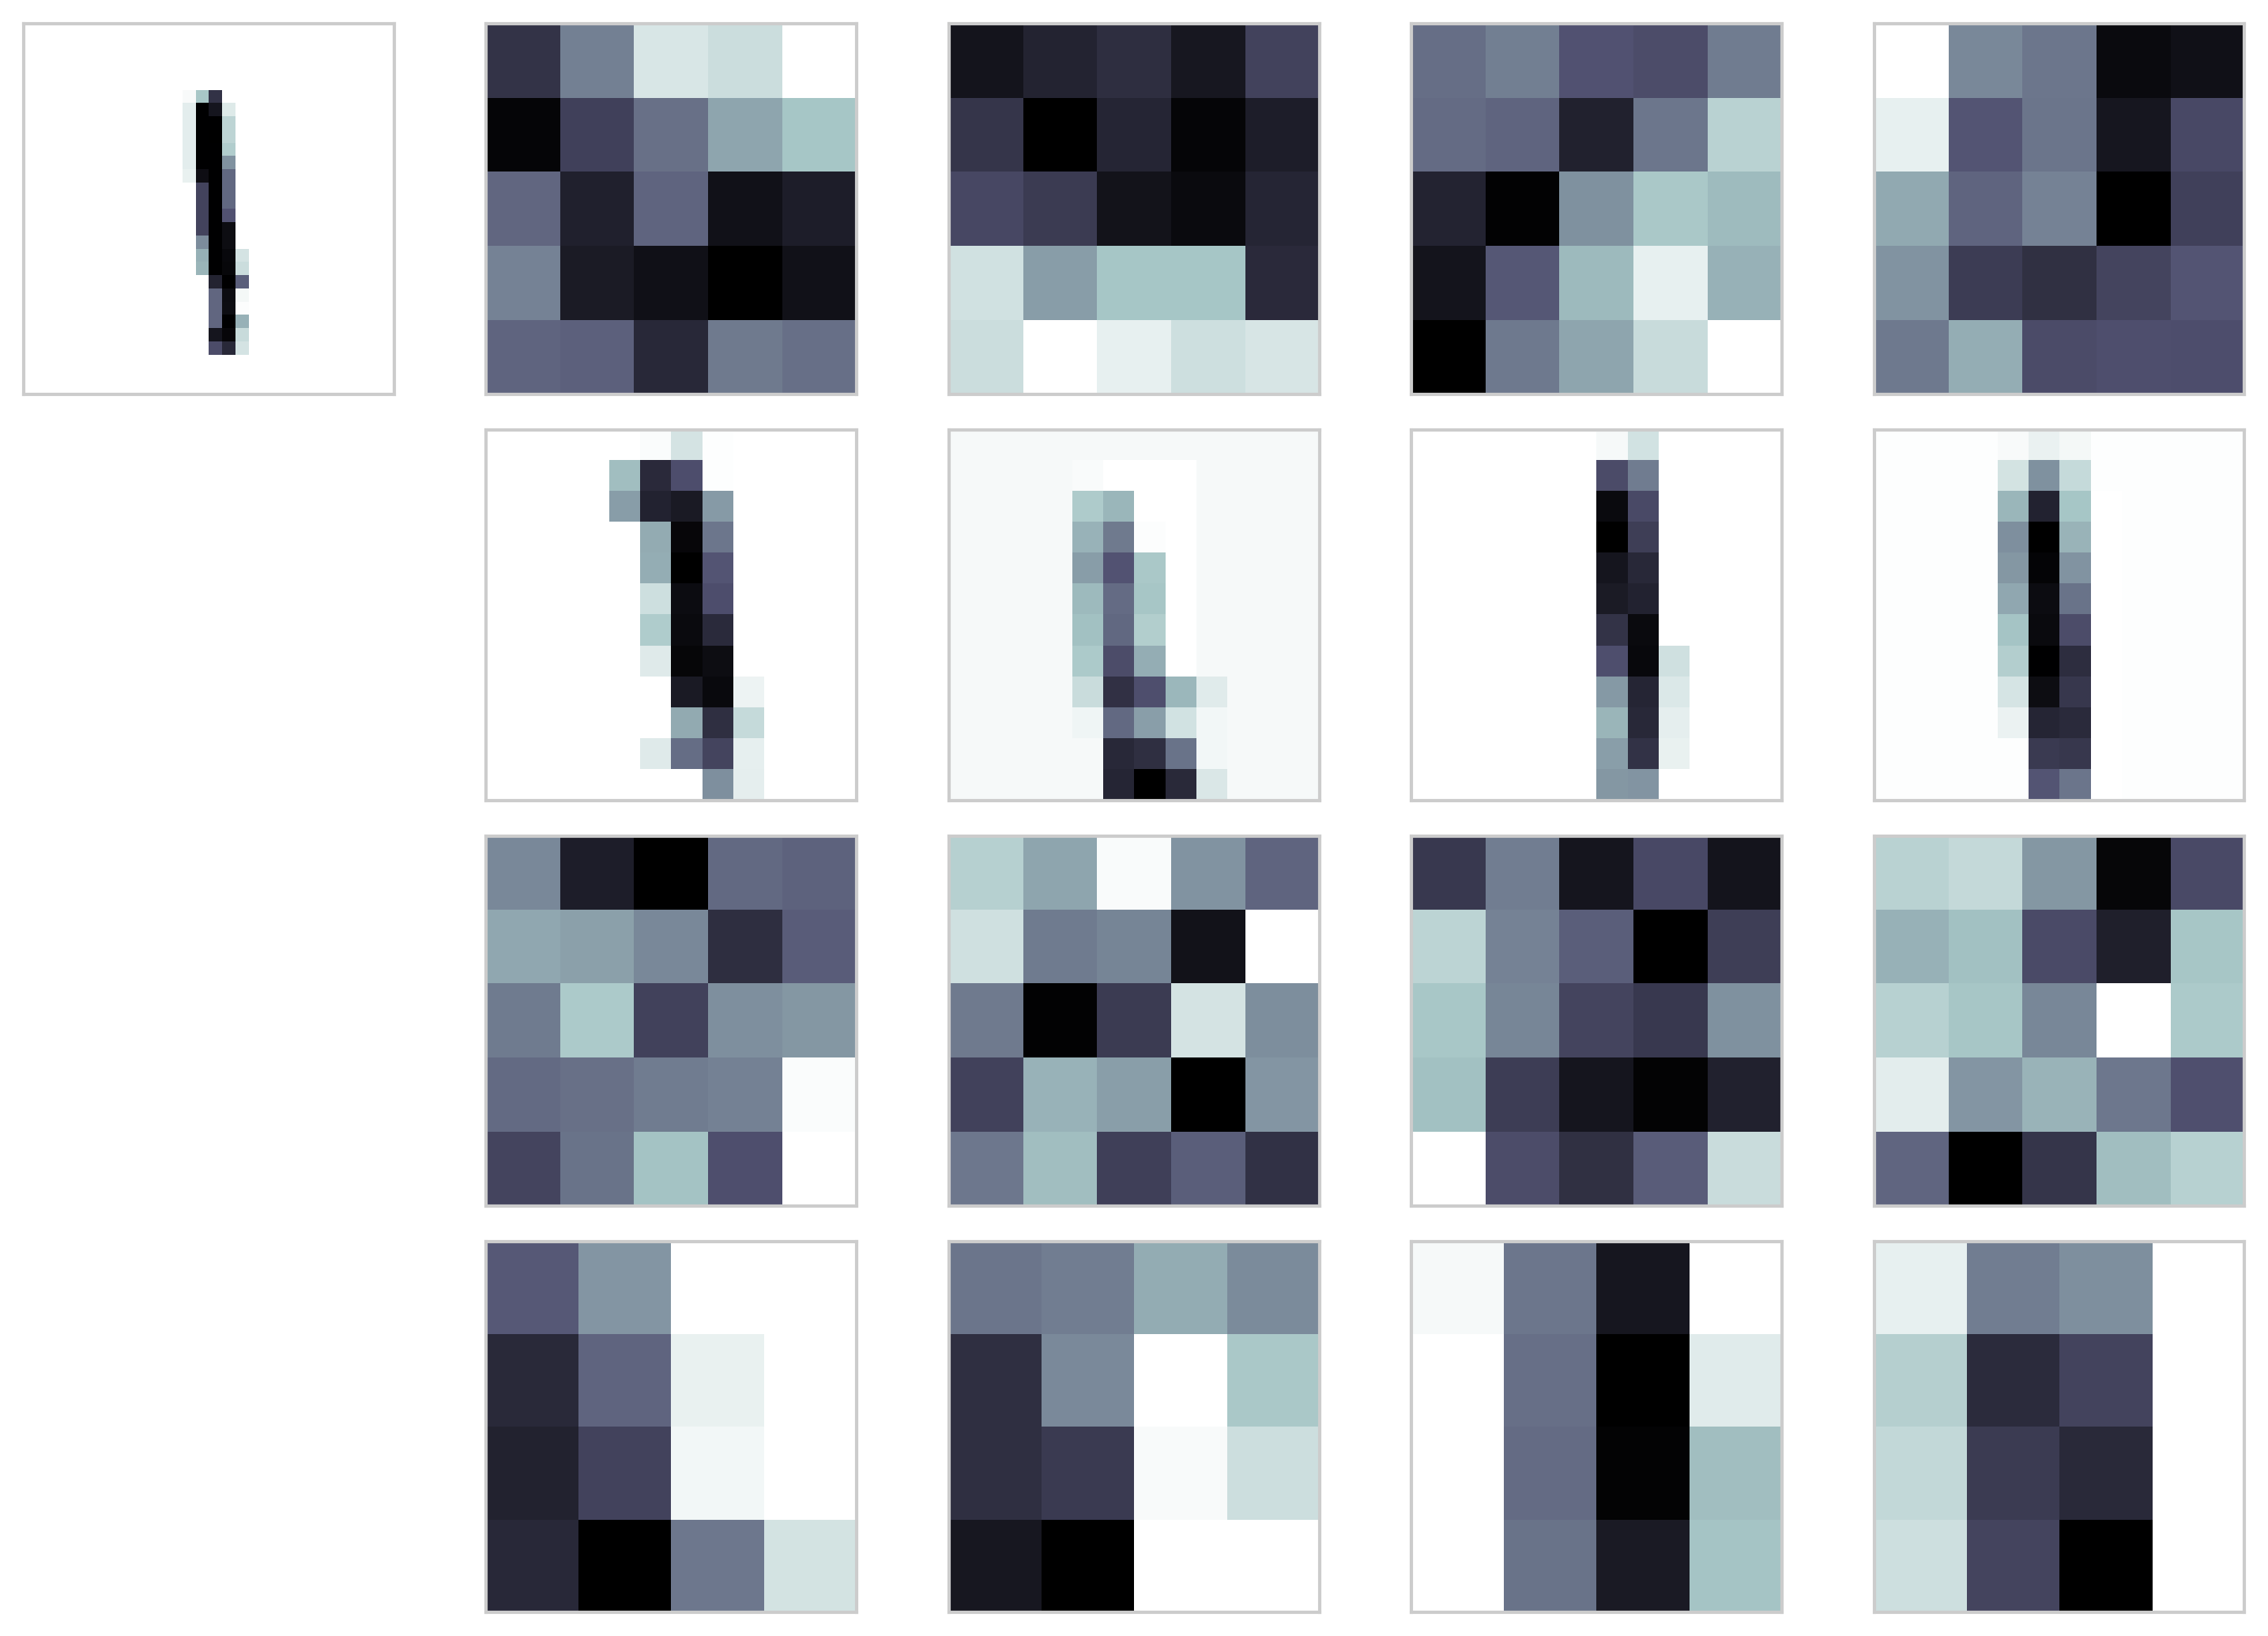

In [58]:
i = 8
visualize2(X_train[i:i + 1])

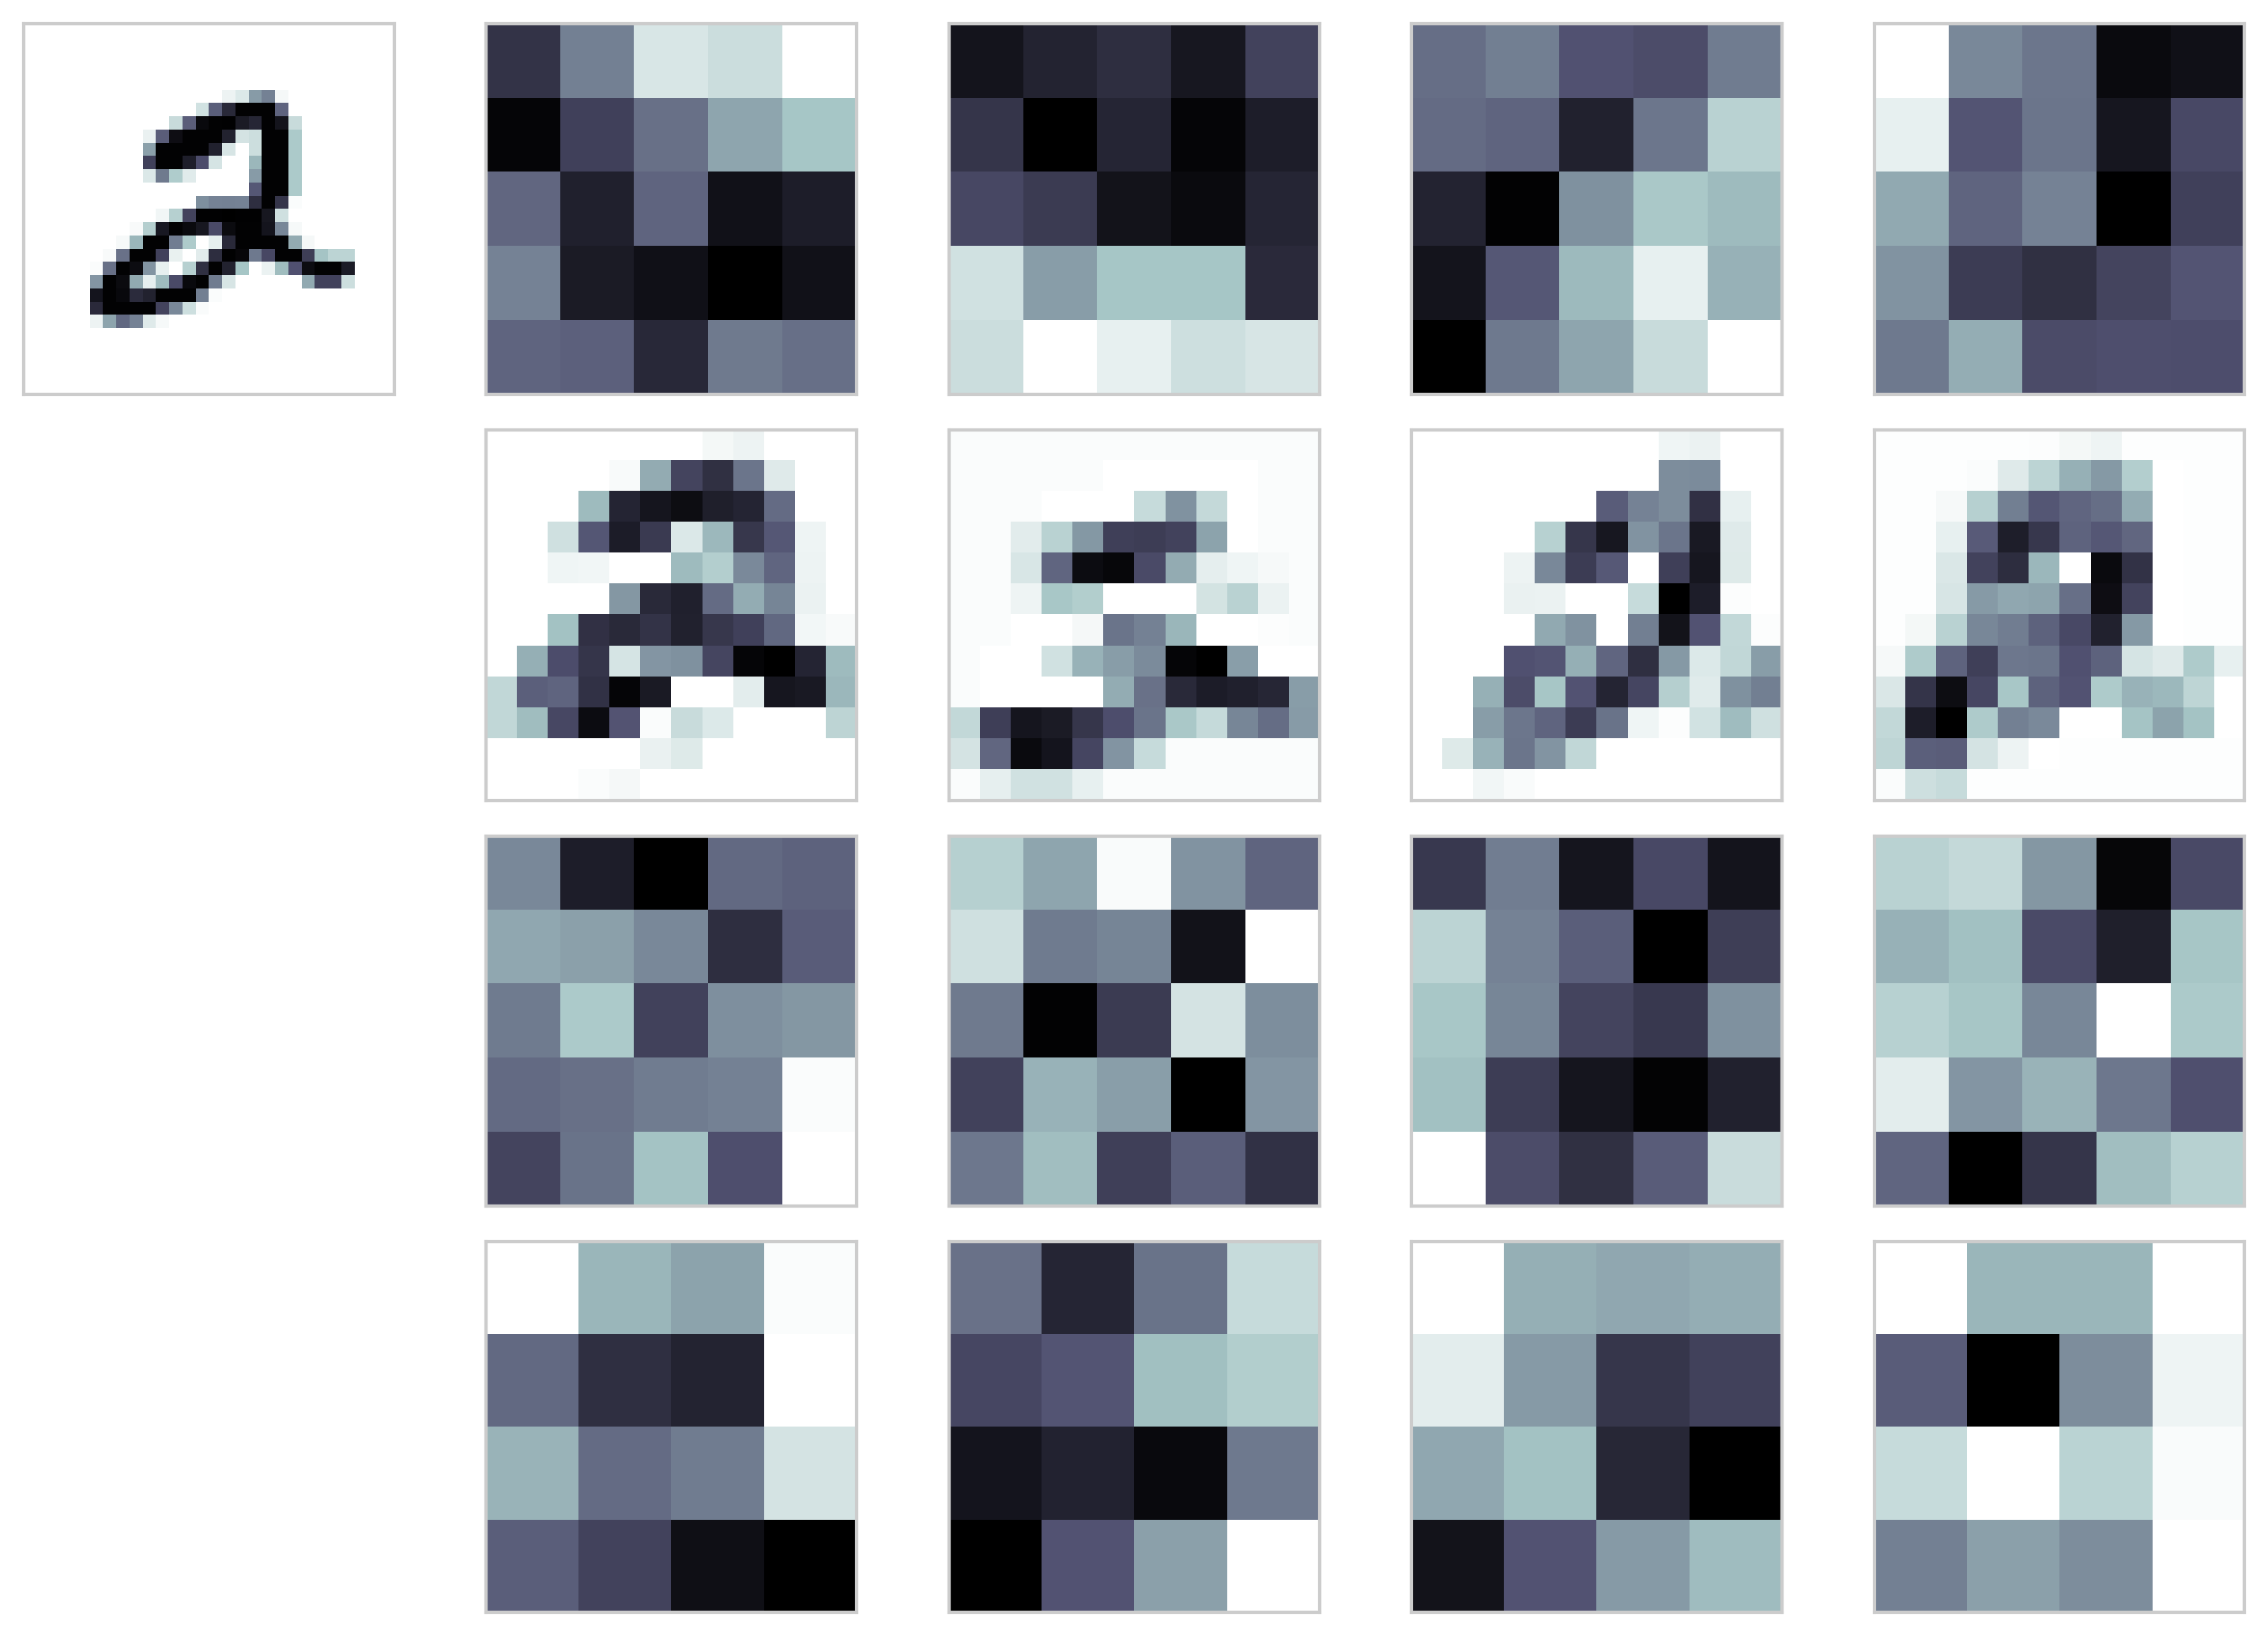

In [59]:
i = 5
visualize2(X_train[i:i + 1])

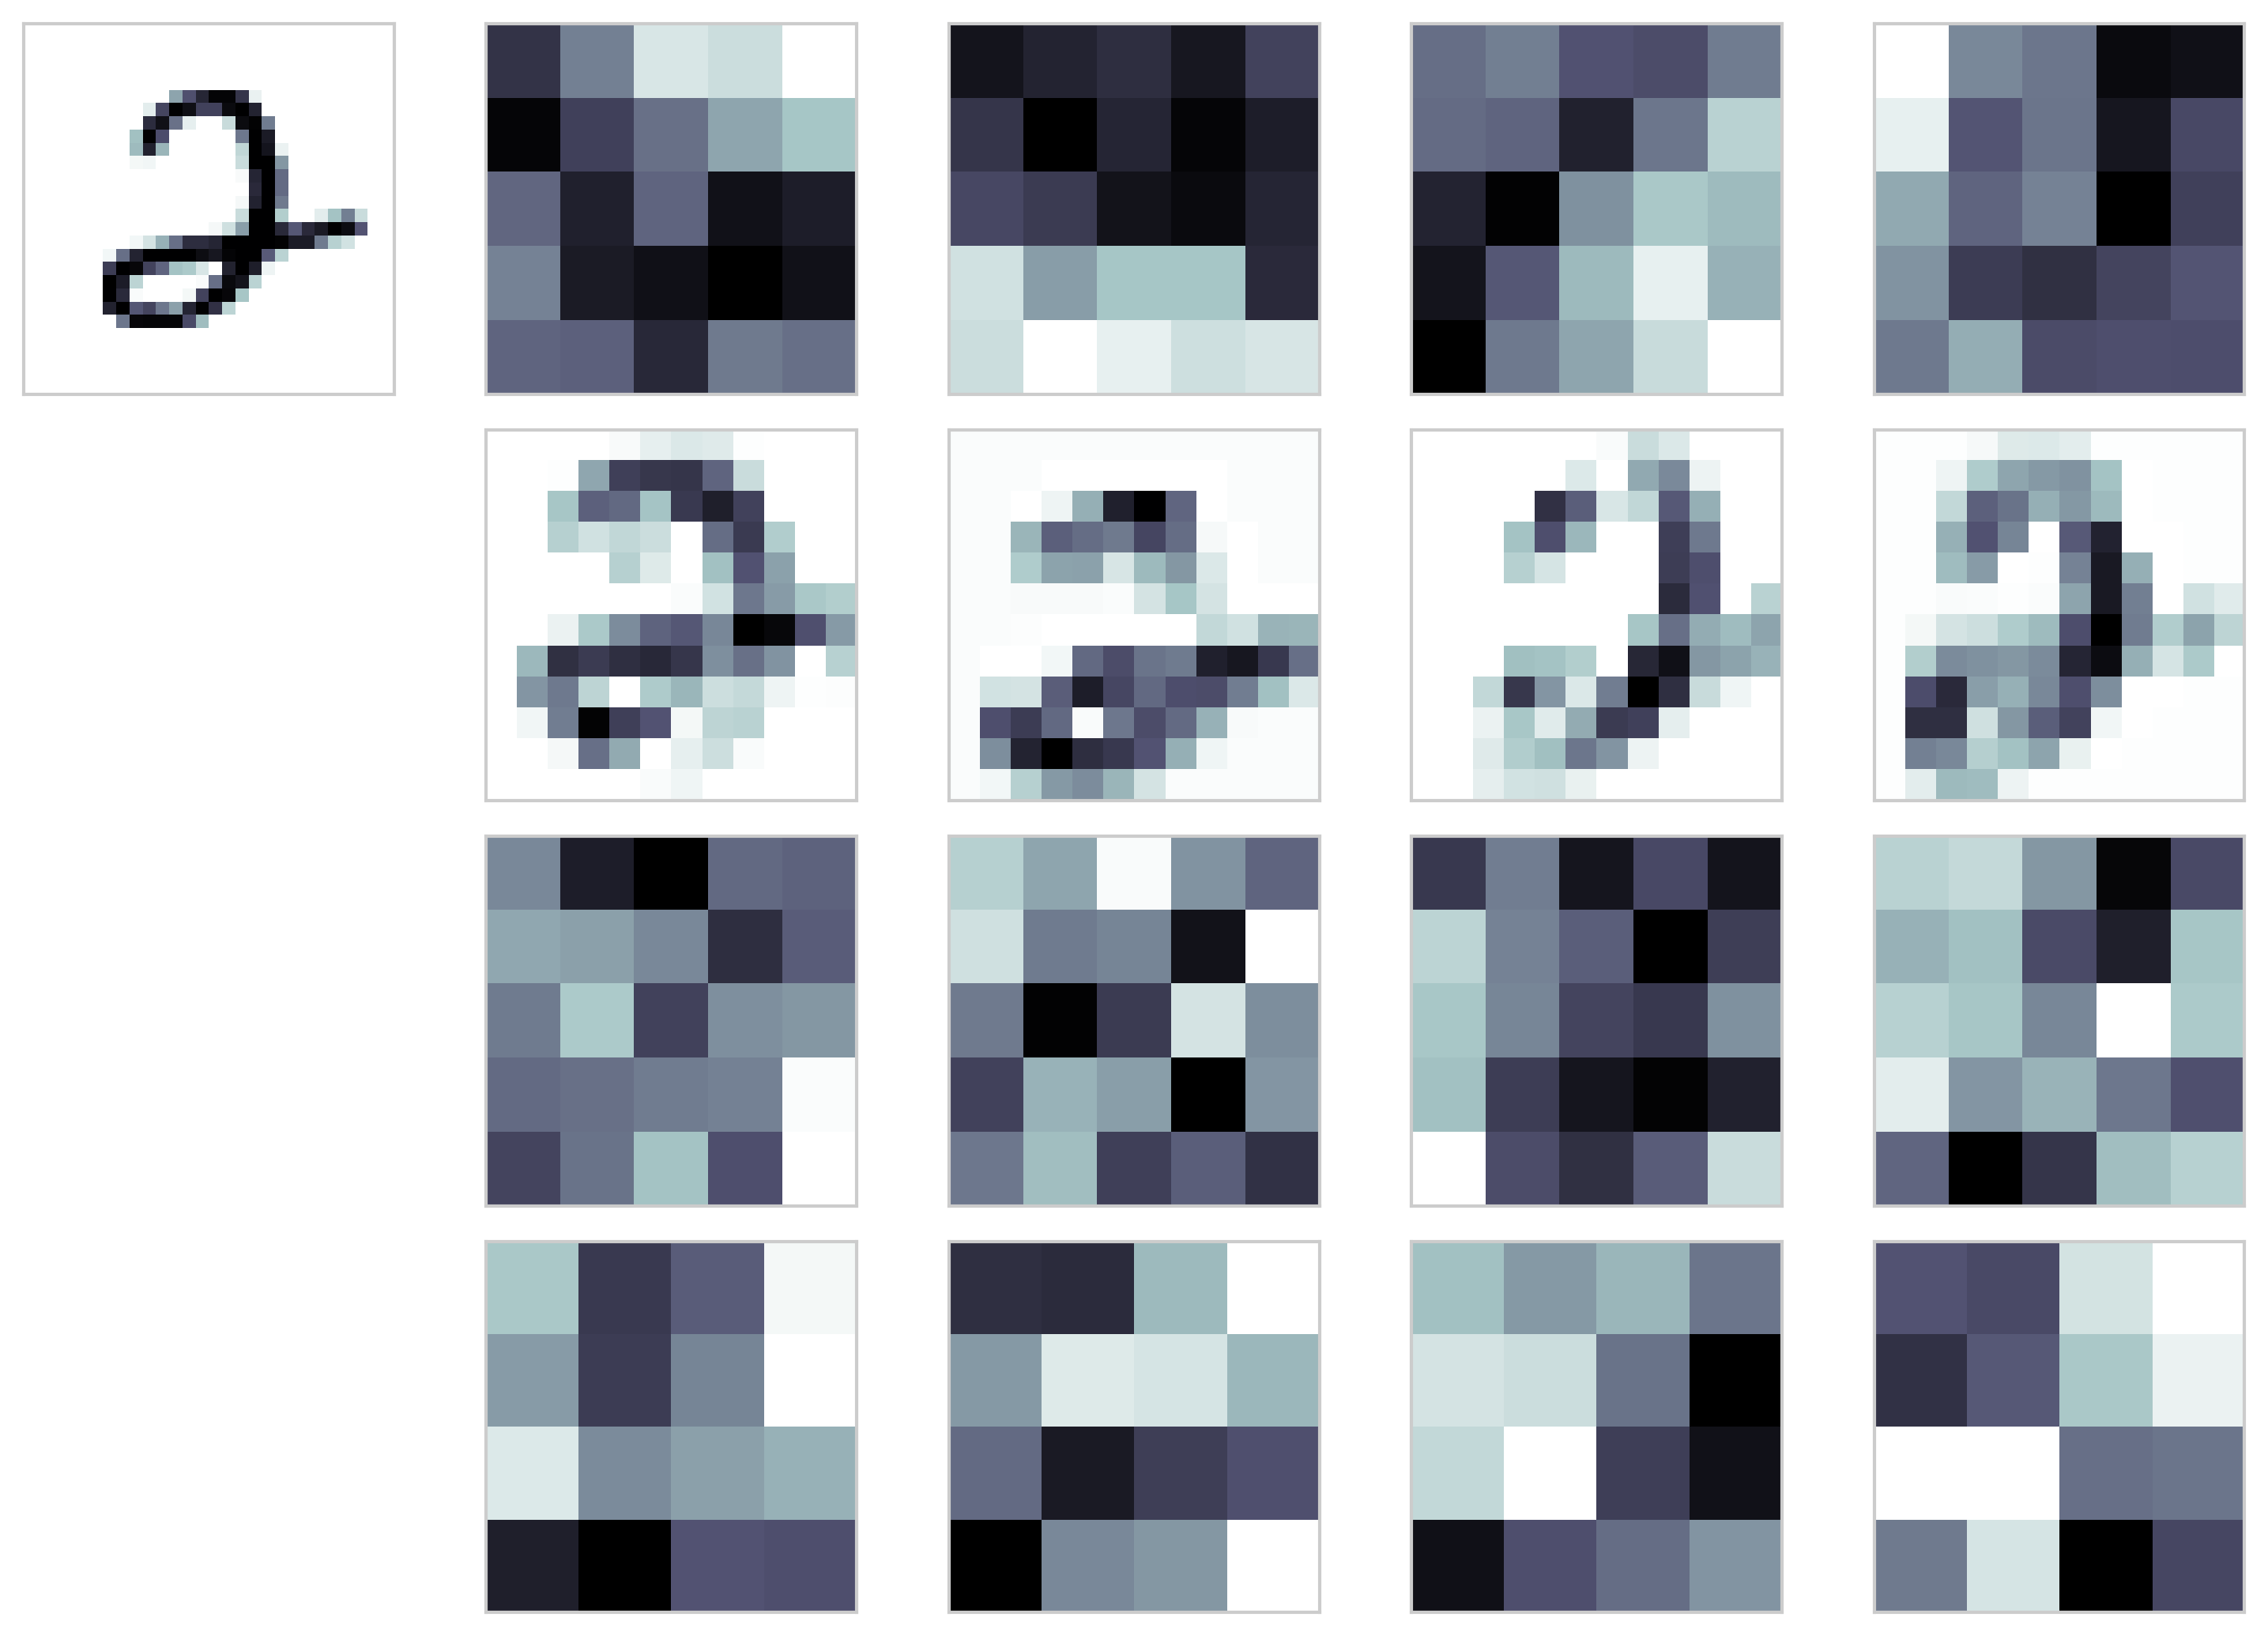

In [60]:
i = 16
visualize2(X_train[i:i + 1])

# 2. CIFAR10

In [1]:
from keras.datasets import cifar10

(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

Using TensorFlow backend.


(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int64


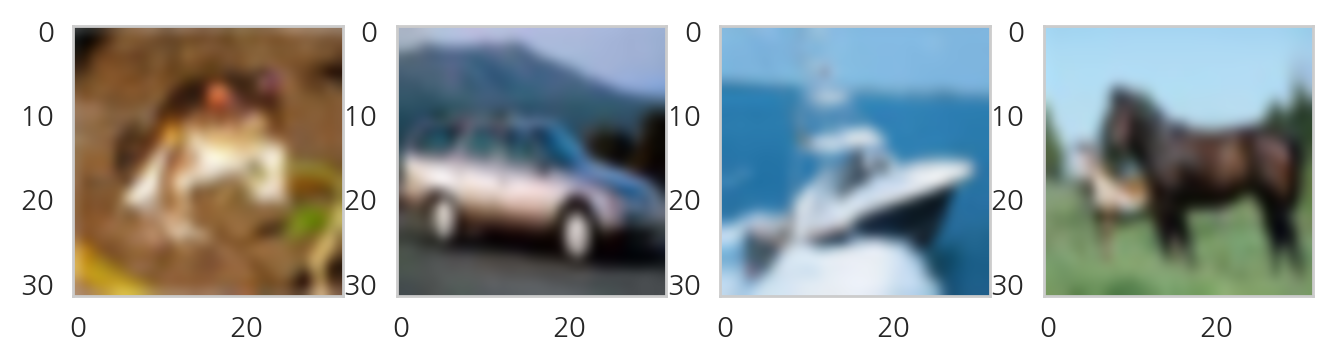

In [2]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

## 2.1. Data Preprocessing

In [3]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [4]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:4]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

## 2.2. Modelling

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

## 2.3. Training

In [8]:
%%time
hist = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test), verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
805s - loss: 2.3446 - acc: 0.1953 - val_loss: 2.0038 - val_acc: 0.2895
Epoch 2/50
799s - loss: 1.8346 - acc: 0.3548 - val_loss: 1.5998 - val_acc: 0.4470
Epoch 3/50
798s - loss: 1.6218 - acc: 0.4480 - val_loss: 1.4994 - val_acc: 0.4986
Epoch 4/50
798s - loss: 1.4549 - acc: 0.5235 - val_loss: 1.2818 - val_acc: 0.5847
Epoch 5/50
797s - loss: 1.3146 - acc: 0.5852 - val_loss: 1.1751 - val_acc: 0.6336
Epoch 6/50
798s - loss: 1.2116 - acc: 0.6293 - val_loss: 1.1841 - val_acc: 0.6374
Epoch 7/50
796s - loss: 1.1256 - acc: 0.6652 - val_loss: 1.0515 - val_acc: 0.6906
Epoch 8/50
796s - loss: 1.0624 - acc: 0.6915 - val_loss: 1.0393 - val_acc: 0.6980
Epoch 9/50
796s - loss: 1.0071 - acc: 0.7157 - val_loss: 0.9961 - val_acc: 0.7227
Epoch 10/50
796s - loss: 0.9634 - acc: 0.7335 - val_loss: 0.9150 - val_acc: 0.7507
Epoch 11/50
796s - loss: 0.9236 - acc: 0.7517 - val_loss: 0.9543 - val_acc: 0.7400
Epoch 12/50
796s - loss: 0.8937 - acc: 0.7654 

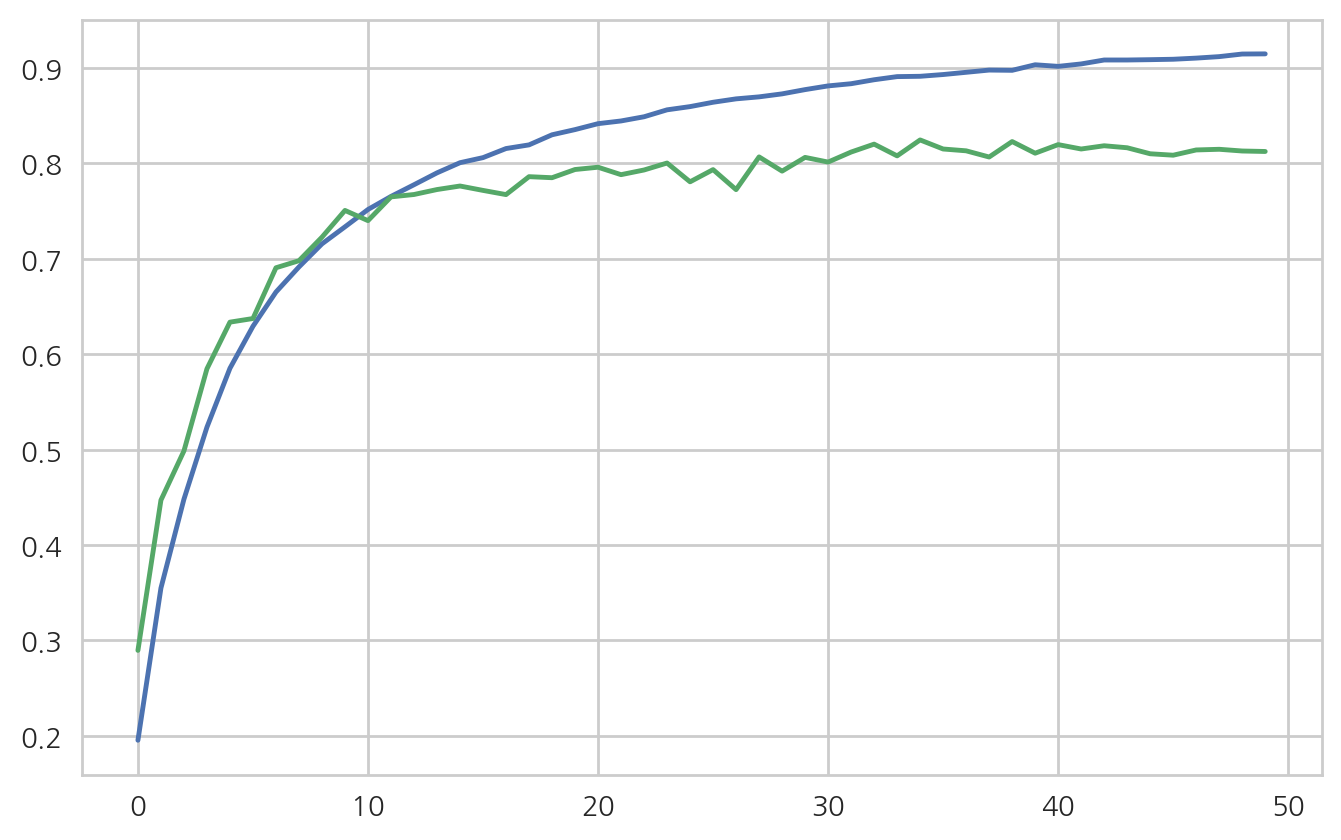

In [9]:
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.show()

In [10]:
model.save("cifar10_2.hdf5")

# 3. Image Augmentation

In [108]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [109]:
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(faces.images, faces.target, test_size=0.4, random_state=0)

In [110]:
X_train = X_train0[:, :, :, np.newaxis]
X_test = X_test0[:, :, :, np.newaxis]

In [111]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)

In [112]:
X_train.shape, Y_train.shape

((240, 64, 64, 1), (240, 40))

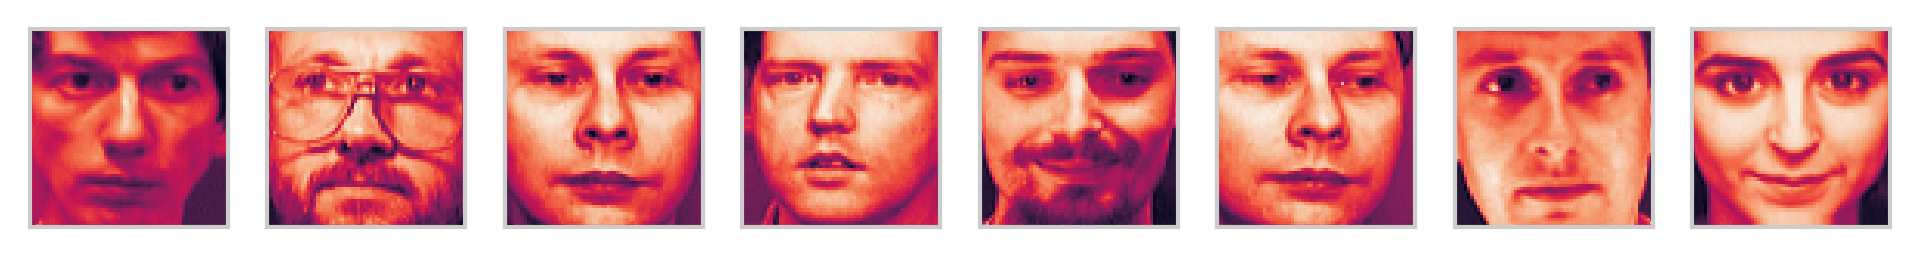

In [113]:
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X_train[i, :, :, 0])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

In [114]:
from keras.preprocessing.image import ImageDataGenerator

In [115]:
train_generator = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [116]:
train_generator.fit(X_train)

In [117]:
batch_size = 8

In [118]:
iterator = train_generator.flow(X_train[:batch_size], Y_train[:batch_size], batch_size=batch_size)

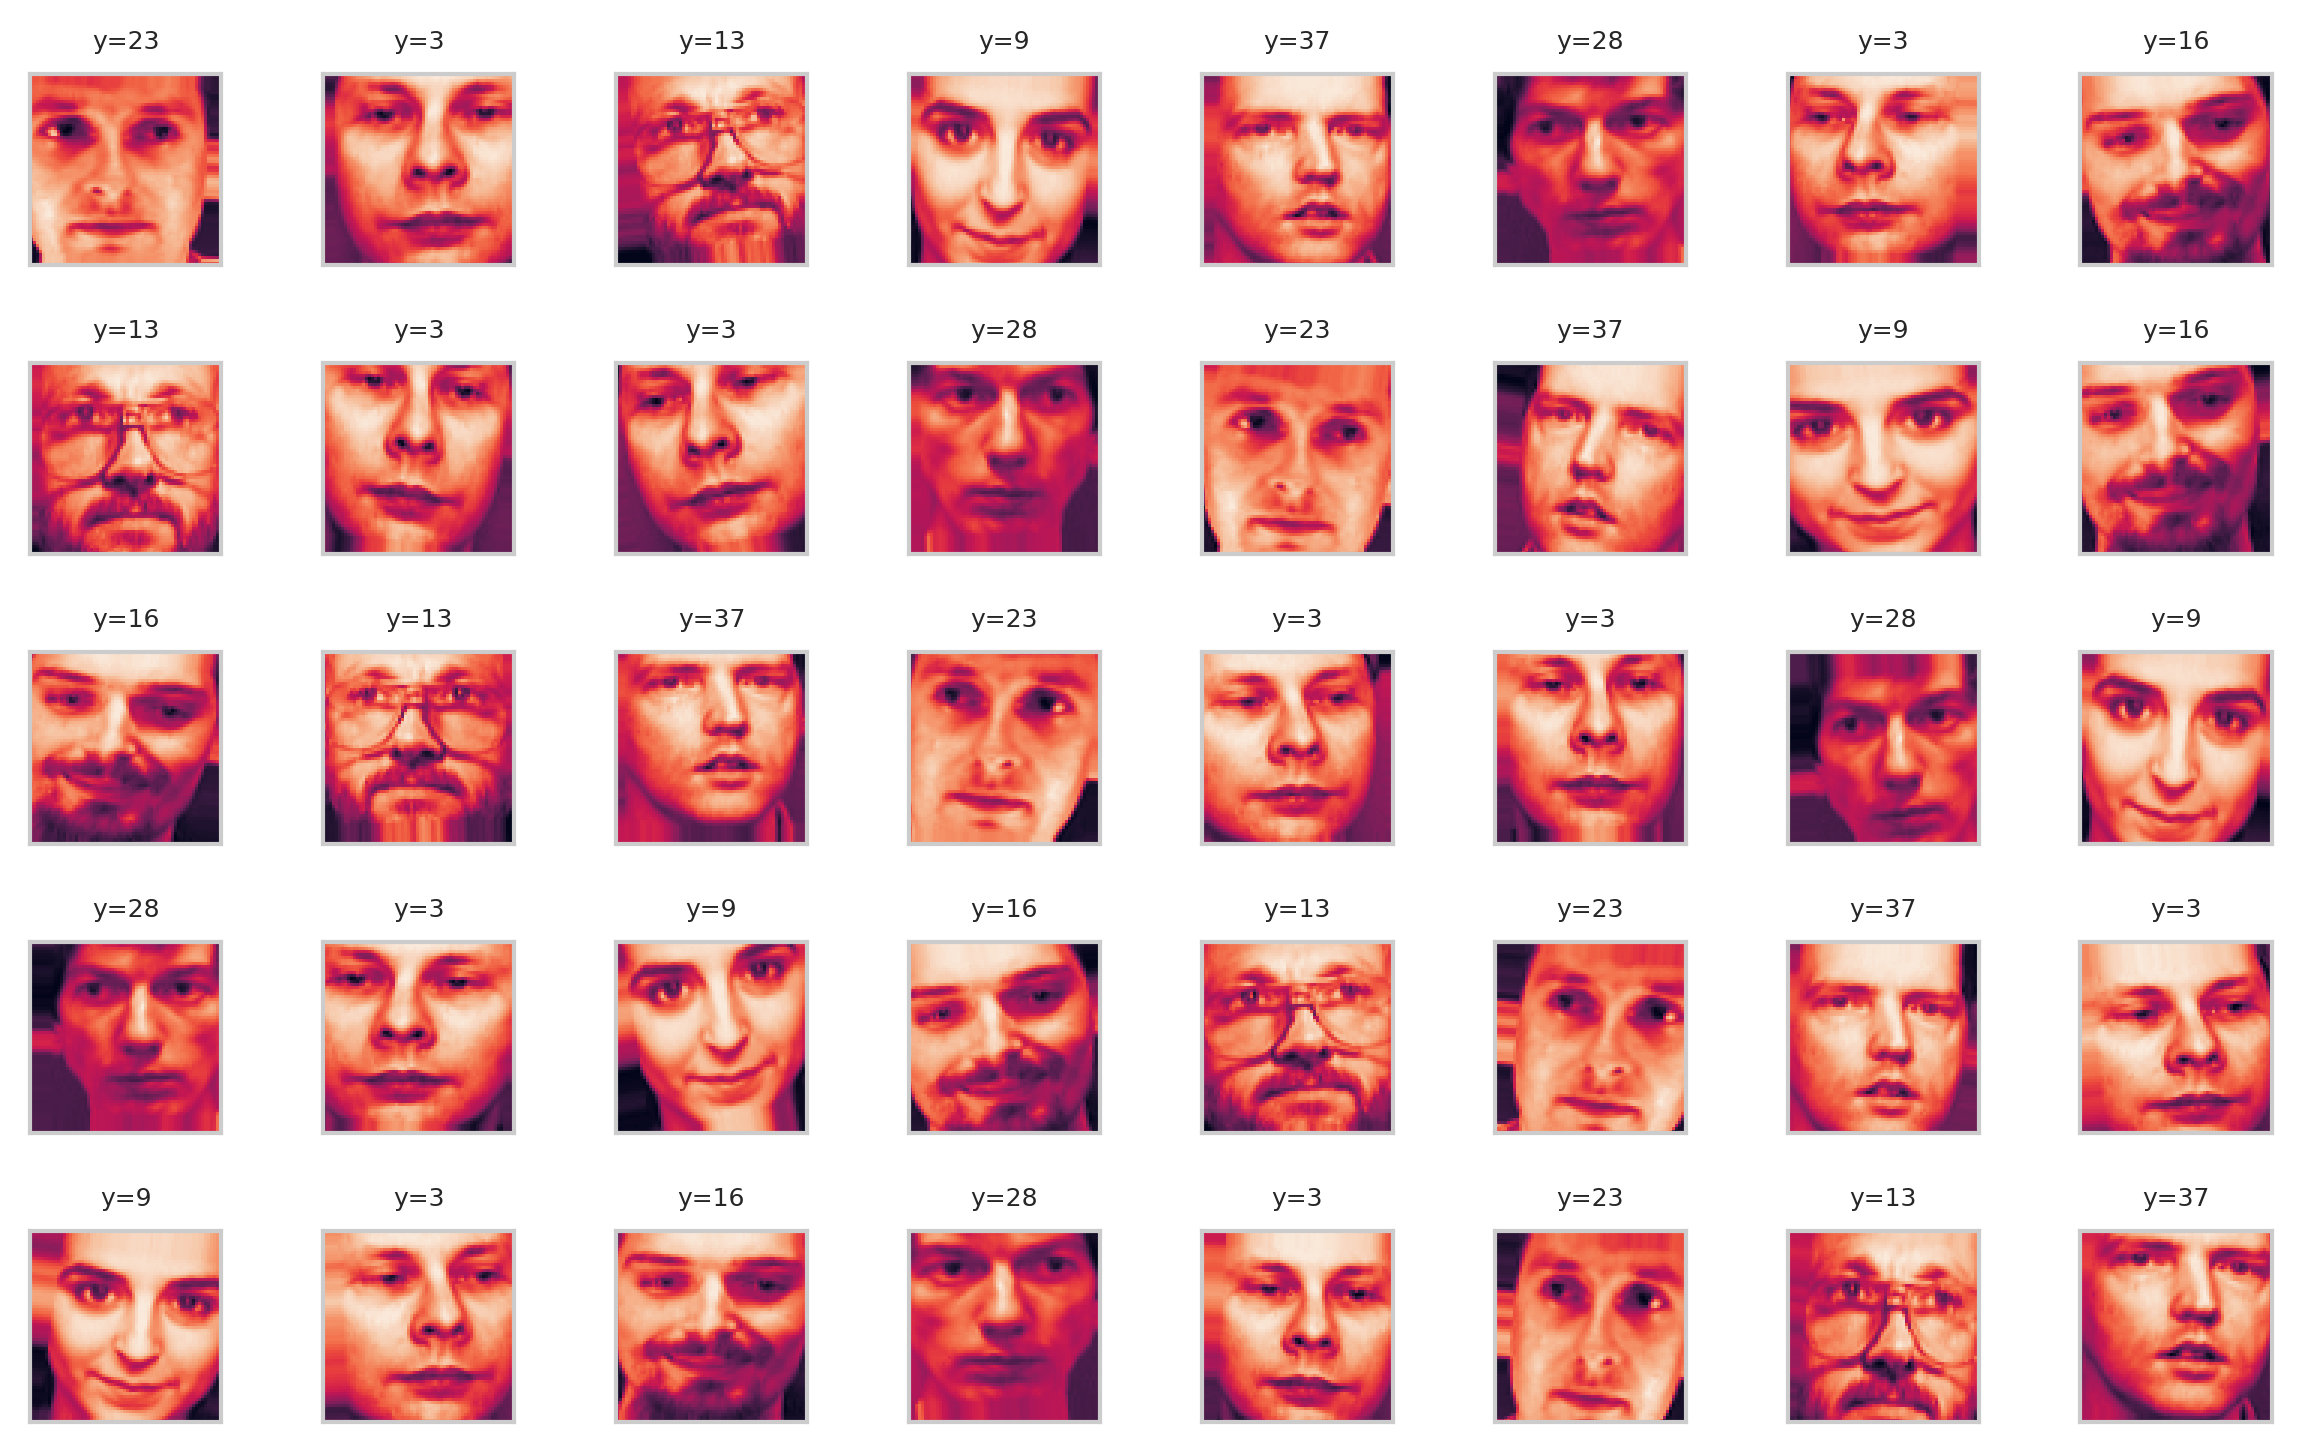

In [119]:
np.random.seed(0)
for i in range(int(40 / batch_size)):
    x_augs, y_augs = iterator.next()
    for j in range(batch_size):
        plt.subplot(5, 8, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :, 0])
        plt.title("y={}".format(np.argmax(y_augs[j, :])), fontsize=6)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()

In [120]:
test_generator = ImageDataGenerator()

In [121]:
train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 50
X_train_new = []
Y_train_new = []
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)

In [122]:
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

In [123]:
X_train_new.shape

(12000, 64, 64, 1)

In [124]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import *
from keras.regularizers import l2

In [125]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import *

np.random.seed(0)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta, SGD
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(20, (4, 4), activation='relu', input_shape=(64, 64, 1), padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(50, (4, 4), activation='relu', padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='tanh', kernel_initializer="glorot_uniform"))
model.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=RMSprop())

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 20)        340       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 50)        16050     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
__________

In [127]:
%%time
hist1 = model.fit(X_train, Y_train, epochs=20, batch_size=120, validation_data=(X_test, Y_test), verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/20
 - 5s - loss: 4.3695 - acc: 0.0125 - val_loss: 3.8257 - val_acc: 0.0125
Epoch 2/20
 - 4s - loss: 3.8620 - acc: 0.0292 - val_loss: 3.6873 - val_acc: 0.0375
Epoch 3/20
 - 5s - loss: 3.6595 - acc: 0.0625 - val_loss: 3.6860 - val_acc: 0.0813
Epoch 4/20
 - 5s - loss: 3.6151 - acc: 0.1167 - val_loss: 3.6735 - val_acc: 0.0875
Epoch 5/20
 - 4s - loss: 3.5851 - acc: 0.0958 - val_loss: 3.6498 - val_acc: 0.0750
Epoch 6/20
 - 6s - loss: 3.4897 - acc: 0.1125 - val_loss: 3.6104 - val_acc: 0.0625
Epoch 7/20
 - 4s - loss: 3.3983 - acc: 0.0875 - val_loss: 3.5405 - val_acc: 0.0938
Epoch 8/20
 - 5s - loss: 3.2994 - acc: 0.2042 - val_loss: 3.3791 - val_acc: 0.1188
Epoch 9/20
 - 5s - loss: 3.1404 - acc: 0.2792 - val_loss: 3.4208 - val_acc: 0.0625
Epoch 10/20
 - 5s - loss: 3.1257 - acc: 0.1208 - val_loss: 3.3103 - val_acc: 0.2500
Epoch 11/20
 - 5s - loss: 2.7963 - acc: 0.4542 - val_loss: 2.8401 - val_acc: 0.3875
Epoch 12/20
 - 5s - loss: 2.7061 - acc:

In [128]:
%%time
hist2 = model.fit(X_train_new, Y_train_new, epochs=20, batch_size=120, validation_data=(X_test, Y_test), verbose=2)

Train on 12000 samples, validate on 160 samples
Epoch 1/20
 - 158s - loss: 1.8667 - acc: 0.5411 - val_loss: 0.7019 - val_acc: 0.8500
Epoch 2/20
 - 156s - loss: 0.7469 - acc: 0.8341 - val_loss: 0.4305 - val_acc: 0.9250
Epoch 3/20
 - 159s - loss: 0.3632 - acc: 0.9291 - val_loss: 0.3489 - val_acc: 0.9125
Epoch 4/20
 - 165s - loss: 0.2100 - acc: 0.9600 - val_loss: 0.2308 - val_acc: 0.9375
Epoch 5/20
 - 165s - loss: 0.1263 - acc: 0.9789 - val_loss: 0.1593 - val_acc: 0.9625
Epoch 6/20
 - 168s - loss: 0.0928 - acc: 0.9821 - val_loss: 0.1737 - val_acc: 0.9562
Epoch 7/20
 - 166s - loss: 0.0674 - acc: 0.9873 - val_loss: 0.1792 - val_acc: 0.9500
Epoch 8/20
 - 178s - loss: 0.0404 - acc: 0.9938 - val_loss: 0.2104 - val_acc: 0.9438
Epoch 9/20
 - 193s - loss: 0.0346 - acc: 0.9941 - val_loss: 0.1592 - val_acc: 0.9562
Epoch 10/20
 - 190s - loss: 0.0280 - acc: 0.9950 - val_loss: 0.1500 - val_acc: 0.9562
Epoch 11/20
 - 179s - loss: 0.0269 - acc: 0.9939 - val_loss: 0.1958 - val_acc: 0.9437
Epoch 12/20
 - 

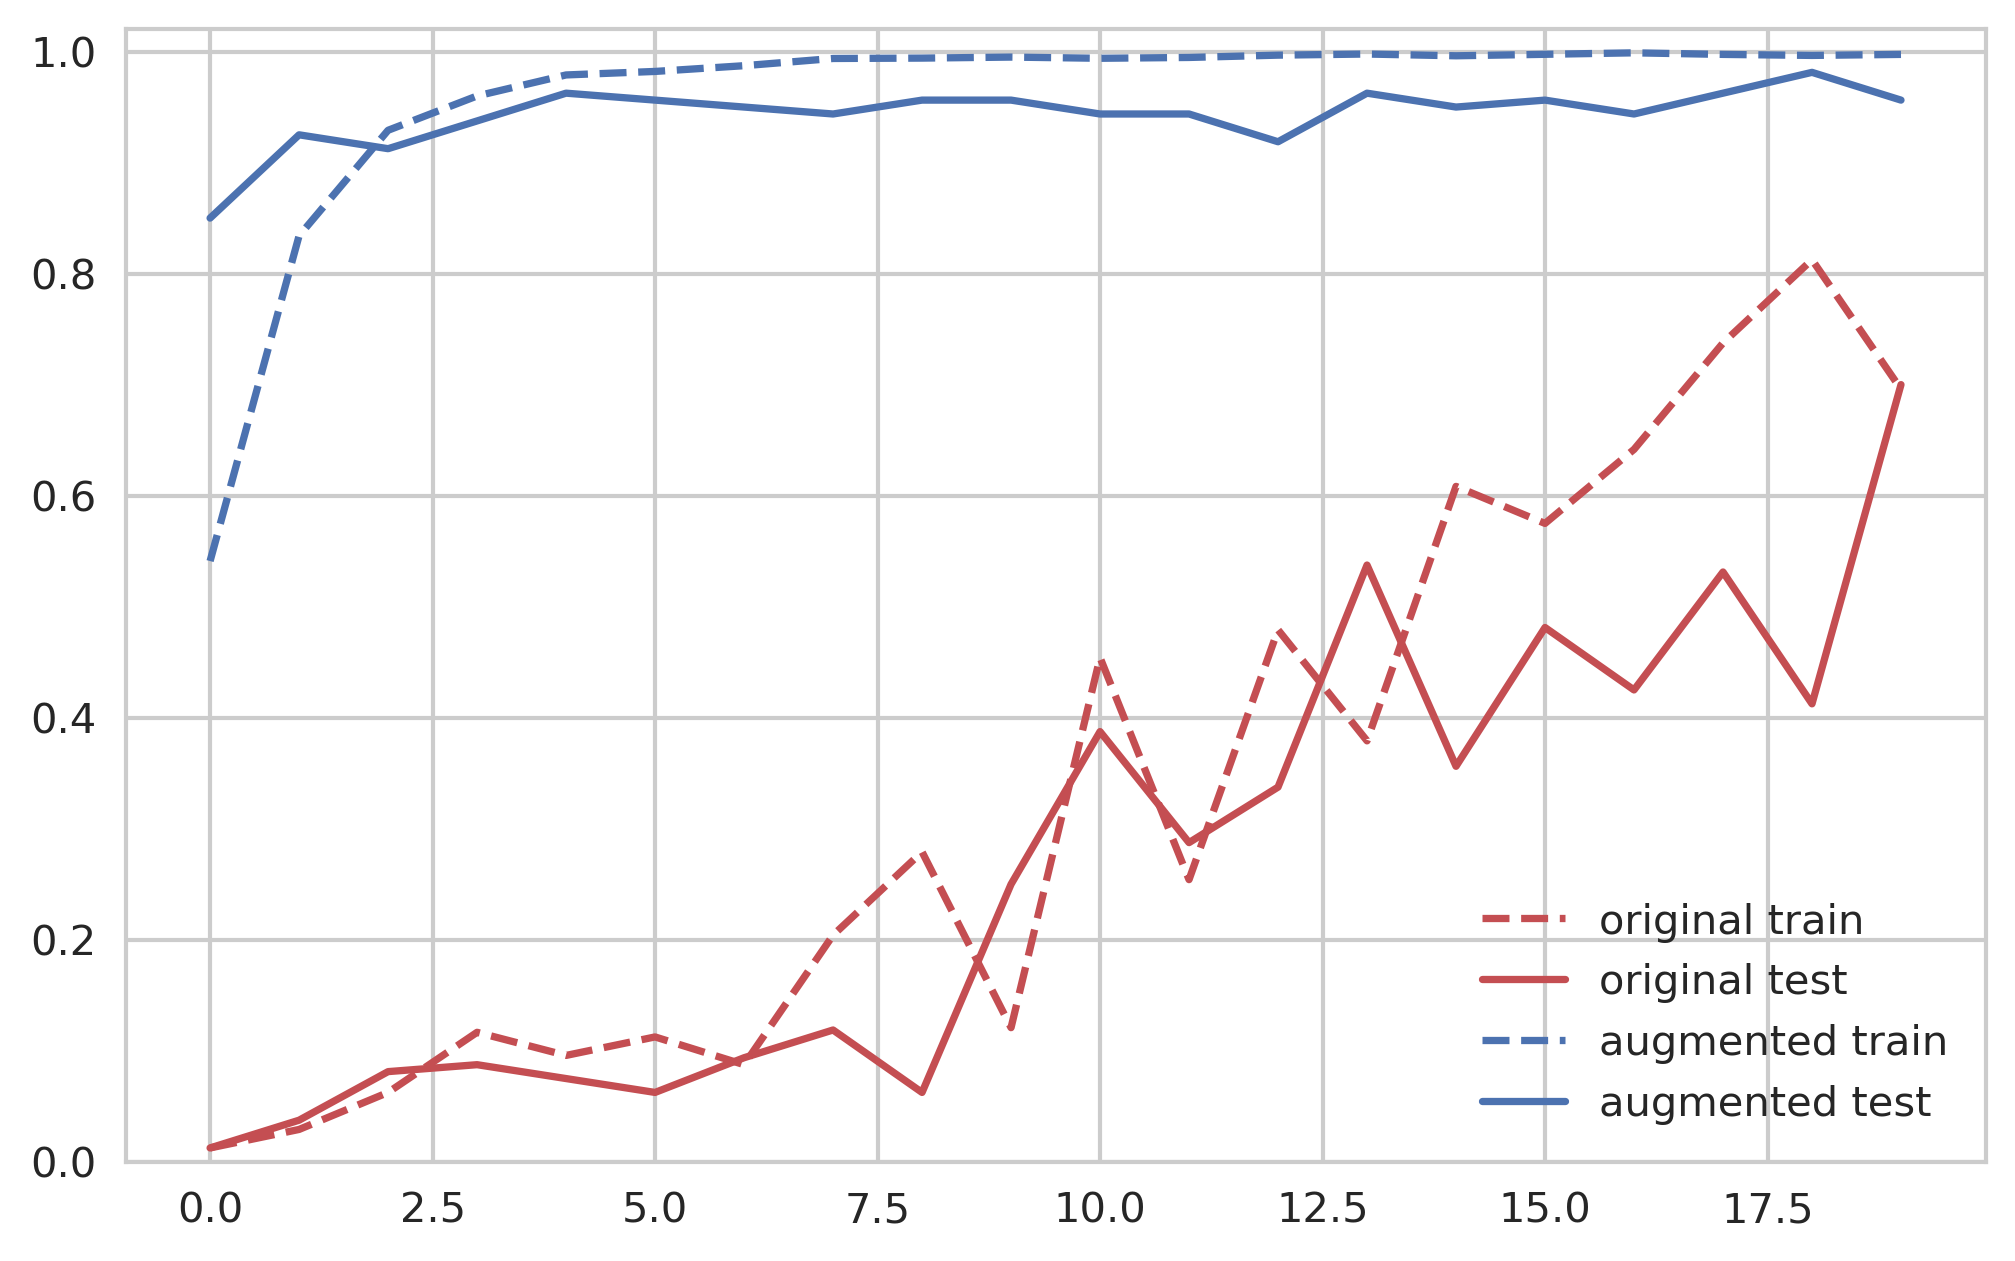

In [137]:
plt.plot(hist1.history['acc'], 'r--', label="original train")
plt.plot(hist1.history['val_acc'], 'r-', label="original test")
plt.plot(hist2.history['acc'], 'b--', label="augmented train")
plt.plot(hist2.history['val_acc'], 'b-', label="augmented test")
plt.ylim(0, 1.02)
plt.legend()
plt.show()

# 4. VGG16

In [2]:
from keras.applications.vgg16 import VGG16, decode_predictions

In [3]:
%%time
model = VGG16()

553467904/553467096 [==============================] - 1326s 2us/step
CPU times: user 28.4 s, sys: 37.6 s, total: 1min 6s
Wall time: 22min 13s


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

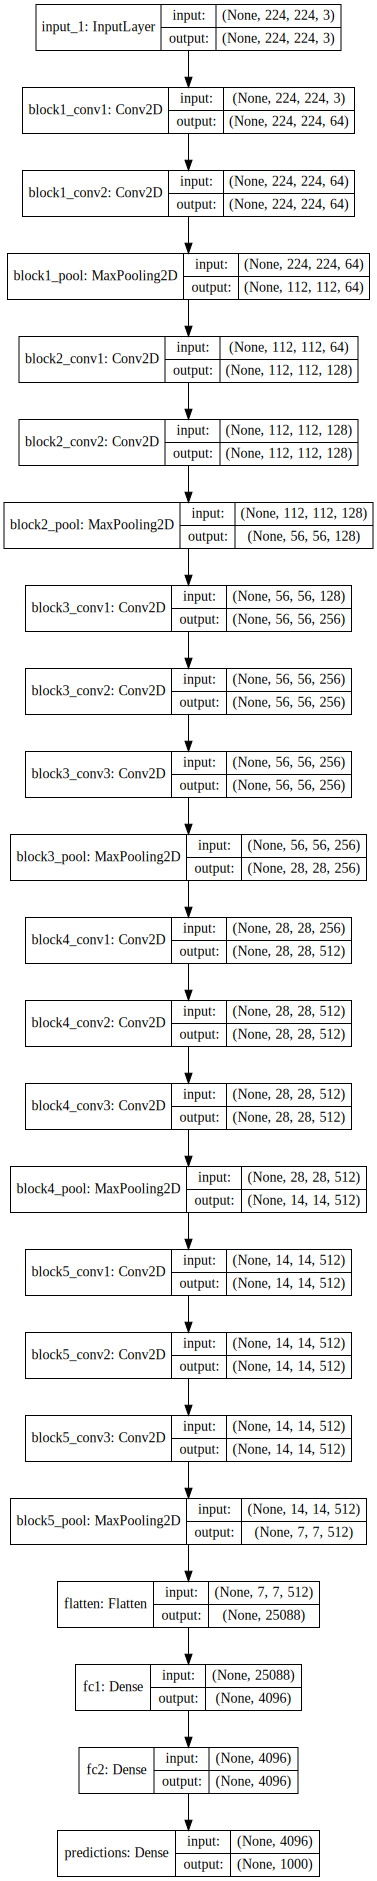

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

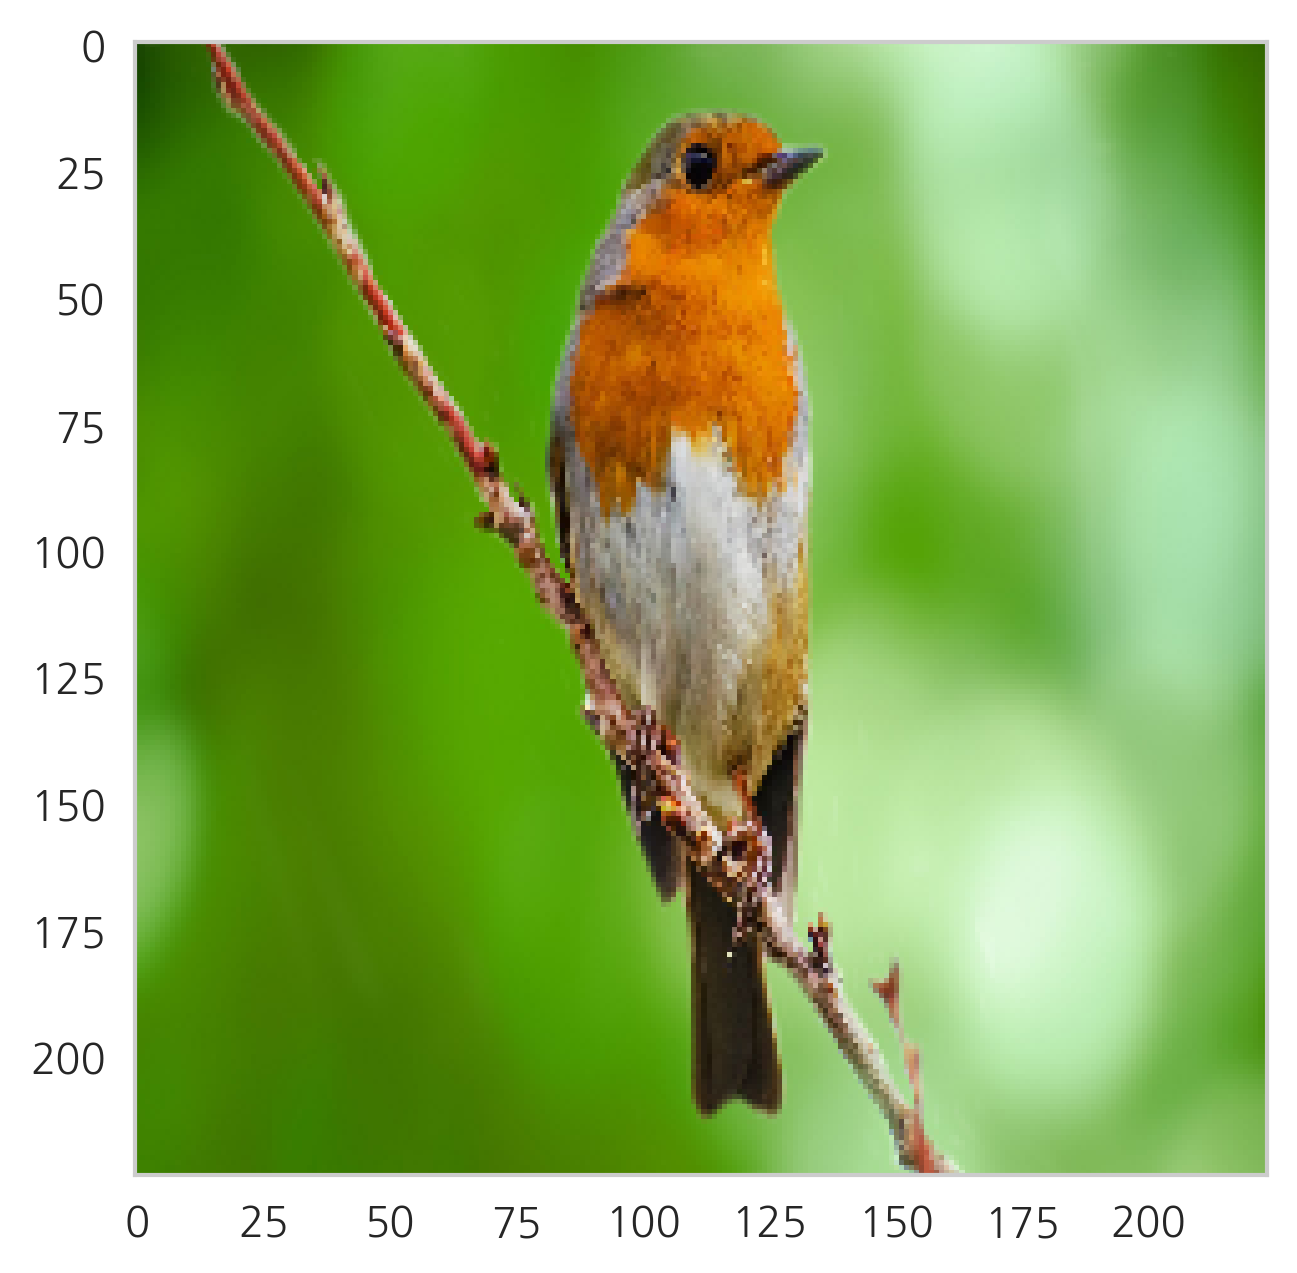

In [7]:
from PIL import Image
 
im = np.array(Image.open('bird1.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [9]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
np.argmax(yhat)

14

In [11]:
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

indigo_bunting (99.99%)
